# Эксперименты по восстановлению профилей дисперсий в трех направлениях для NGC3245 (UGC5663)

Сначала всякие настройки и импорты

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import poly1d, polyfit, power
import math
import scipy.optimize
from math import *
from IPython.display import HTML
from IPython.display import Image
import os
import pandas as pd
import PIL as pil
import heapq
from IPython.display import display
%matplotlib inline

#Размер изображений
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 12, 12

#Наклон галактики по данным NED
incl=61.9

# Масштаб пк/секунда из NED
scale=117

Всякие картинки и БД для большего удобства:

In [30]:
# Данные из SDSS DR9
HTML('<iframe src=http://skyserver.sdss3.org/dr9/en/tools/explore/obj.asp?ra=10:27:18.4&dec=+28:30:27 width=1000 height=350></iframe>')

In [31]:
# Данные из HYPERLEDA
HTML('<iframe src=http://leda.univ-lyon1.fr/ledacat.cgi?o=ngc3245 width=1000 height=350></iframe>')

In [32]:
# Данные из NED
HTML('<iframe src=http://ned.ipac.caltech.edu/cgi-bin/objsearch?objname=ngc+3245&extend=no&hconst=73&omegam=0.27&omegav=0.73&corr_z=1&out_csys=Equatorial&out_equinox=J2000.0&obj_sort=RA+or+Longitude&of=pre_text&zv_breaker=30000.0&list_limit=5&img_stamp=YES width=1000 height=350></iframe>')

In [33]:
os.chdir("C:\\science\\2FInstability\\data\\ngc3245")

#Выводим данные за header-а файла
for line in file("v_stars_ma.dat"):
    if line[0] == '#':
        print(line)

# UGC 5663 = NGC 3245

# Zasov+2012

# PA = 355 deg; PA_maj = 177.2 deg (from Mendez-Abreu+2008)

# not corrected for V_sys

# inclination = 61.9 deg (NED) (q_b = 0.52 - Mendez-Abreu+2008)

# data ARE NOT corrected for inclination

# r        vel       d_vel   sig     d_sig

# "        km/s      km/s    km/s    km/s

#(1)       (2)       (3)     (4)     (5)



Выведем также для удобства данные из обоих файлов: 

In [34]:
pd.set_option('display.notebook_repr_html', True)
ma = pd.read_csv('v_stars_ma.dat', skiprows=9, sep='   ', engine='python')
# display(ma)

In [35]:
mi = pd.read_csv('v_stars_mi.dat', skiprows=9, sep='   ', engine='python')
# display(mi)

Посмотрим теперь на все доступные даные по кривым вращения. Т.к. некоторые из них скорректированы, а некоторые нет, разобьем этот этап на несколько шагов.

Данные Коткова по газу вдоль главной оси:

In [36]:
n3245pa355_gas = pd.read_csv('.\\gas\\n3245pa355_gas_corr.txt', sep=' ')
display(n3245pa355_gas)

,"r,""",v_Hbeta,e_V,max_Hb,e_max,sig_Hb,e_sig,v_OIII,e_v,max_OIII_1,e_max.1,sig_OIII,e_sig.1,[OIII]/Hbeta,e_oiii_hb,S/N(HB),S/N(OIII)
0,-32.85,1518.62,18.8,777.49,116.0,116.87,21.80,1472.71,14.90,413.76,112.0,64.52,20.90,-0.10,0.2110,2.37,2.68
1,-21.65,1510.07,21.8,583.89,82.9,137.73,24.40,1471.74,10.90,559.51,215.0,43.05,18.70,-0.09,0.2700,2.74,3.87
2,-15.71,1426.74,20.0,622.31,182.0,74.43,26.70,1428.93,8.12,654.17,97.0,64.61,11.40,0.39,0.2240,2.57,6.36
3,-12.19,1415.81,20.0,552.01,168.0,72.51,26.90,1422.73,7.64,622.88,94.0,61.45,11.00,0.41,0.2310,2.75,7.45
4,-9.69,1424.72,13.8,1161.15,-0.0,34.67,5.02,1423.40,7.10,702.56,86.8,66.97,9.82,0.50,0.1040,4.38,7.46
5,-7.51,1414.65,21.0,895.11,-0.0,26.88,6.08,1420.45,8.43,553.72,50.2,94.05,10.30,0.77,0.1160,2.14,6.75
6,-6.04,1460.12,16.5,1209.44,-0.0,21.45,3.86,1414.45,9.20,444.38,40.3,100.74,11.00,0.67,0.0997,3.31,6.48
7,-5.17,1459.18,16.7,779.44,-0.0,32.58,5.75,1437.37,11.70,321.17,25.8,135.06,13.00,0.67,0.0941,3.37,6.68
8,-4.45,1431.82,14.8,678.43,174.0,66.60,20.50,1406.03,11.00,378.10,24.7,153.58,12.00,0.54,0.1800,3.93,6.23
9,-3.75,1433.98,13.8,786.38,187.0,66.84,19.00,1388.74,10.50,429.39,25.3,162.20,11.40,0.56,0.1660,5.08,6.46


[]

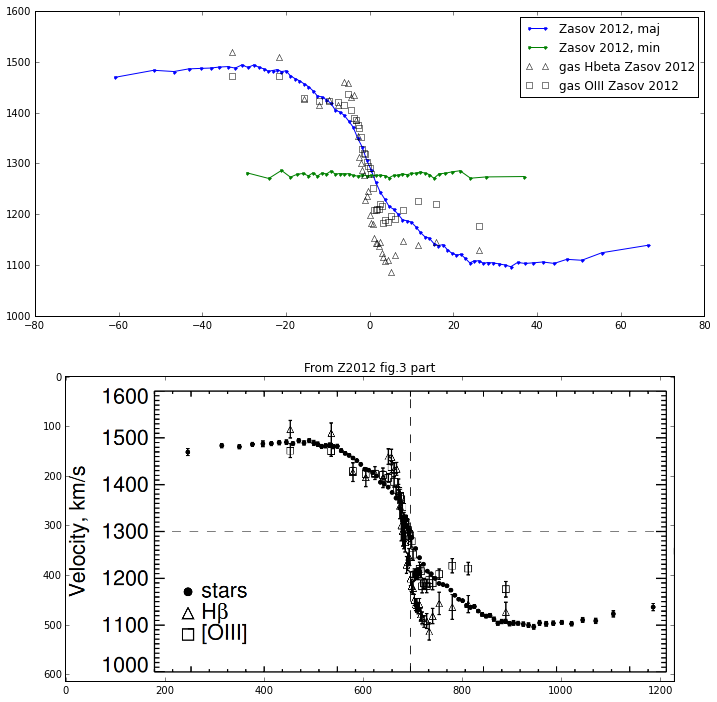

In [37]:
try:
    from PIL import Image
except:
    import Image

# Данные по звездной кинематике Засова 2012 вдоль большей полуоси, не исправленные за наклон 
zasov_raw_data = np.loadtxt("v_stars_ma.dat", float)
r_ma, vel_ma, e_vel_ma, sig_ma, e_sig_ma = zip(*zasov_raw_data)

# Данные по звездной кинематике Засова 2012 вдоль малой полуоси, не исправленные за наклон 
zasov_raw_data = np.loadtxt("v_stars_mi.dat", float)
r_mi, vel_mi, e_vel_mi, sig_mi, e_sig_mi = zip(*zasov_raw_data)

# Данные по кинематике газа Засова 2012 вдоль большой полуоси, не исправленные за наклон (они же Катков)
# Водород
r_g_H = n3245pa355_gas['r,"']
vel_g_H = n3245pa355_gas['v_Hbeta']
e_vel_g_H = n3245pa355_gas['e_V']

# Кислород
r_g_O = n3245pa355_gas['r,"']
vel_g_O = n3245pa355_gas['v_OIII']
e_vel_g_O = n3245pa355_gas['e_v']


fig, subplot = plt.subplots(2, 1)
subplot[0].plot(r_ma, vel_ma, '.-', label="Zasov 2012, maj")
subplot[0].plot(r_mi, vel_mi, '.-', label="Zasov 2012, min")
subplot[0].plot(r_g_H, vel_g_H, '^', label="gas Hbeta Zasov 2012", mfc='none')
subplot[0].plot(r_g_O, vel_g_O, 's', label="gas OIII Zasov 2012", mfc='none')
subplot[0].legend()

subplot[1].imshow(np.asarray(Image.open("zasov2012_fig3_part.png")))
subplot[1].set_title("From Z2012 fig.3 part")
plt.plot()

Теперь построим график дисперсий скоростей на луче зрения вдоль большой и малой осей по данным Засова:

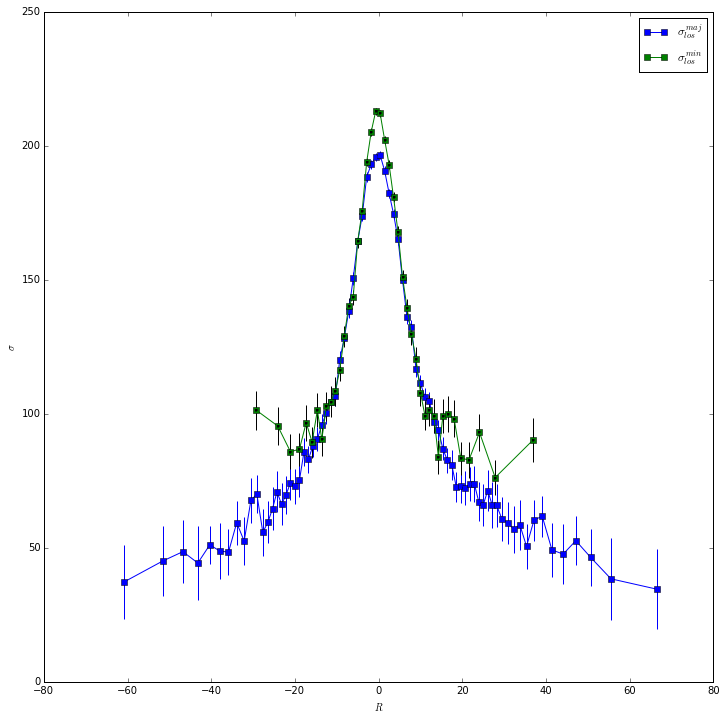

In [38]:
plt.plot(r_ma, sig_ma, 's-', label='$\sigma_{los}^{maj}$')
plt.errorbar(r_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='blue')
plt.plot(r_mi, sig_mi, 's-', label='$\sigma_{los}^{min}$')
plt.errorbar(r_mi, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='black')
plt.xlabel('$R$')
plt.ylabel('$\sigma$')
plt.legend()
plt.show()

Что мы видим? Даже без исправления значения вдоль малой оси на косинус угла видно, что центры двух кривых совсем не совпали, а это значит, что щели спектрометра не были точно соорентированы на центр и/или по осям галактики. Однако рассматриваемый случай оказывается достаточно простым - кривая вращения вдоль малой оси почти везде ноль, вдоль большой - симметрична, значит ${PA}_{maj}$ было определено правильно, просто щель для большой оси оказалась немного смещена. Данные и по скоростям, и по дисперсиям необходимо исправить, методика исправления описана ниже.

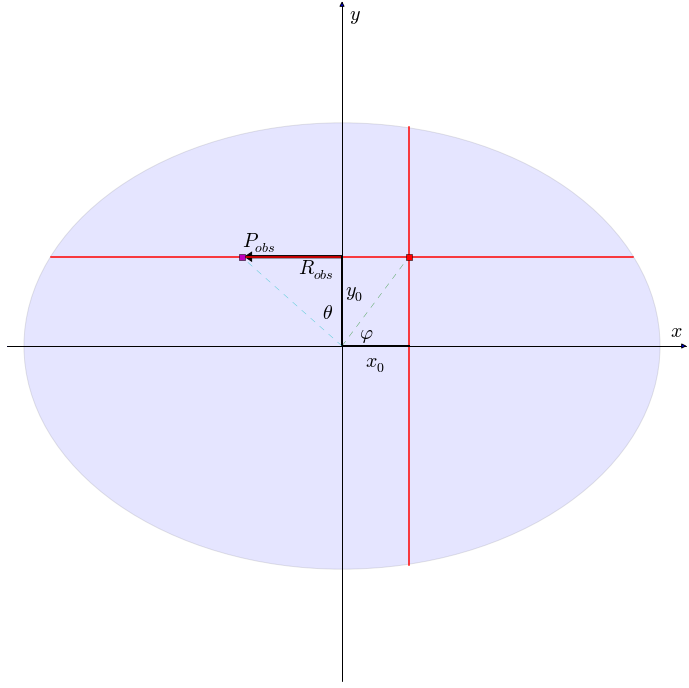

In [39]:
from mpl_toolkits.axes_grid.axislines import SubplotZero

fig = plt.figure(1)
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    ax.axis[direction].set_axisline_style("-|>")
    ax.axis[direction].set_visible(True)

for direction in ["left", "right", "bottom", "top"]:
    ax.axis[direction].set_visible(False)

x = np.linspace(-1., 1., 100)
y = np.zeros(100)
ax.plot(x, y)

from pylab import figure, show, rand
from matplotlib.patches import Ellipse
e = Ellipse(xy=(0,0), width=1.9, height=1.0, angle=0.0)

ax.add_artist(e)
e.set_clip_box(ax.bbox)
e.set_alpha(0.1)
e.set_facecolor('blue')

ax.set_ylim(-0.75, 0.75)
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])

ax.text(0.98, 0.02, "$x$", fontsize=20)
ax.text(0.02, 0.73, "$y$", fontsize=20)
ax.plot((0.0, 0.2), (0.0, 0.2), '--', lw=0.3)
ax.text(0.05, 0.015, r"$\varphi$", fontsize=20)
ax.plot((0.2, 0.2), (-0.49, 0.49), '-', lw=1.5, color='r')
ax.plot((-0.87, 0.87), (0.2, 0.2), '-', lw=1.5, color='r')
ax.plot(0.2, 0.2, 's')
ax.text(0.01, 0.11, "$y_0$", fontsize=20)
ax.text(0.07, -0.05, "$x_0$", fontsize=20)
ax.plot((0.0, 0.2), (0.0, 0.0), '-', lw=2.0, color='k')
ax.plot((0.0, 0.0), (0.0, 0.2), '-', lw=2.0, color='k')
ax.text(-0.3, 0.22, "$P_{obs}$", fontsize=20)
ax.arrow(0, 0.2, -0.27, 0.0, head_width=0.02, head_length=0.02, fc='k', ec='k', width=0.005)
ax.plot((0., -0.3), (0., 0.2), '--', lw=0.3)
ax.text(-0.06, 0.06, r"$\theta$", fontsize=20)
ax.text(-0.13, 0.16, "$R_{obs}$", fontsize=20)
ax.plot(-0.3, 0.2, 's')

plt.show()

Пусть центр координат находится в истинном центре галактики, углы осей ${PA}_{maj}$ и ${PA}_{min}$ определены правильно, но щели спектрометра пересекаются в точке $(x_0,y_0)$. Угол $\varphi$ очевидно равен $$\varphi=\arctan \frac{y_0}{x_0}$$ Тогда расстояния и скорости для точки $P_{obs}$ для соответствующей оси (на рисунке выше - для большой) пересчитываются по следующему правилу: $$R_{real} = R_{obs}\times\frac{\sqrt{\sin^2\theta\cos^2i+\cos^2\theta}}{\cos i\sin \theta},$$ $$V_{real} = V_{obs}\times\frac{\sqrt{\sin^2\theta\cos^2i+\cos^2\theta}}{\sin i\cos i\sin \theta},$$ где $\theta$ есть угол на соответствующую точку.

В нашем случае из-за того, что $\sigma_{los, maj}(0) < \sigma_{los, min}(0)$, а также по причинам, которые были указаны выше, смещена щель только вдоль большой оси, угол $\varphi=90^{\circ}$. Угол $\theta$ и его тригонометрические функции в свою очередь считаются как $$\theta = \arctan \frac{R_{obs}}{y_0}, \sin \theta = \frac{R_{obs}}{\sqrt{R_{obs}^2 + y_0^2}}, \cos \theta = \frac{y_0}{\sqrt{R_{obs}^2 + y_0^2}}$$ После восстановления скоростей исправлять за наклон галактики профиль уже не нужно (случай $\theta=0^{\circ}$). 

Остается лишь вопрос, как найти $y_0$. В рассматриваемом случае это сделать просто (но не совсем честно) - достаточно взять исправленный профиль $\sigma_{los}^{min}(R)$ и посмотреть, на каком расстоянии значения будут равны значениям $\sigma_{los}^{maj}$ в центре. Иными словами, $y_0$ определяется условием $$\sigma_{los}^{min}(y_0) = \sigma_{los}^{maj}(0)$$ Найдем это значение, после чего исправим соответствующим образом кривую вращения.

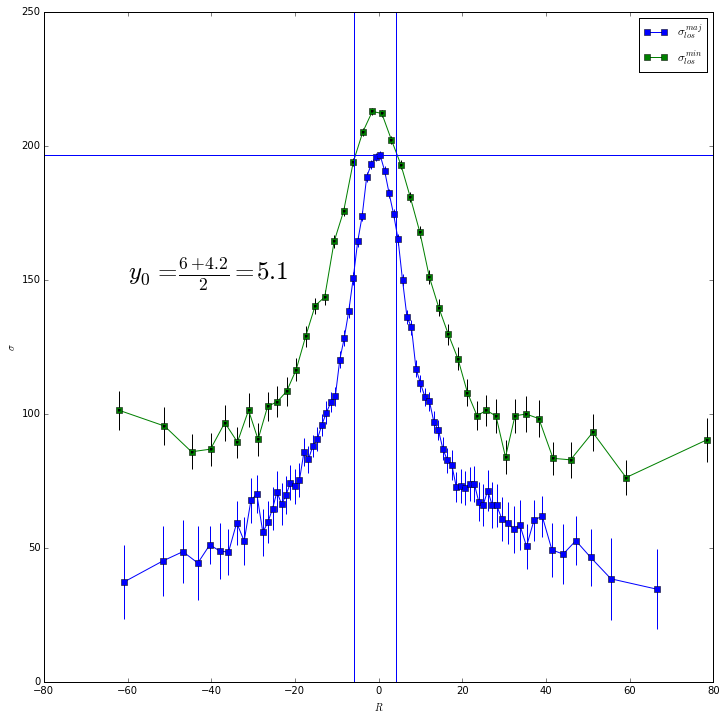

In [40]:
# Исправляем значения вдоль малой оси на синус угла:    
def correct_min(R):    
    return R / cos(incl * pi / 180) 

r_mi_extend = map(correct_min, r_mi)
    
plt.plot(r_ma, sig_ma, 's-', label='$\sigma_{los}^{maj}$')
plt.errorbar(r_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='blue')
plt.plot(r_mi_extend, sig_mi, 's-', label='$\sigma_{los}^{min}$')
plt.errorbar(r_mi_extend, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='black')
plt.xlabel('$R$')
plt.ylabel('$\sigma$')

#Подбираем значения y_0
plt.axhline(y=sig_ma[sig_ma.__len__()/2-1])
plt.axvline(x=-6.0)
plt.axvline(x=4.2)
plt.text(-60, 150, r"$y_0 = \frac{6+4.2}{2}=5.1$", fontsize=25)
plt.legend()
plt.show()

Также не забудем, что полученное значение $y_0$ надо исправить за $\cos i$, ибо мы считали его по малой оси:

In [41]:
y_0 = 5.1*cos(incl * pi / 180)

def sin_theta(R_obs):
    return R_obs/sqrt(R_obs**2 + y_0**2)

def cos_theta(R_obs):
    return y_0/sqrt(R_obs**2 + y_0**2)

cos_i, sin_i = cos(incl * pi / 180), sin(incl * pi / 180)

def correct_radii_maj(R_obs):
    return R_obs * sqrt(sin_theta(R_obs)**2 * cos_i**2 + cos_theta(R_obs)**2) / cos_i /  abs(sin_theta(R_obs))

def correct_velocity_maj(V_obs, R_obs):
    return V_obs * sqrt(sin_theta(R_obs)**2 * cos_i**2 + cos_theta(R_obs)**2) / (sin_i * cos_i * abs(sin_theta(R_obs)))

In [42]:
r_ma1 = map(correct_radii_maj, r_ma)
vel_ma1 = map(correct_velocity_maj, map(lambda l: abs(l-1300.5), vel_ma), r_ma)
e_vel_ma1 = map(correct_velocity_maj, e_vel_ma, r_ma)

r_g_H1 = map(correct_radii_maj, r_g_H)
vel_g_H1 = map(correct_velocity_maj, map(lambda l: abs(l-1300.5), vel_g_H), r_g_H)
e_vel_g_H1 = map(correct_velocity_maj, e_vel_g_H, r_g_H)

r_g_O1 = map(correct_radii_maj, r_g_O)
vel_g_O1 = map(correct_velocity_maj, map(lambda l: abs(l-1300.5), vel_g_O), r_g_O)
e_vel_g_O1 = map(correct_velocity_maj, e_vel_g_O, r_g_O)

[]

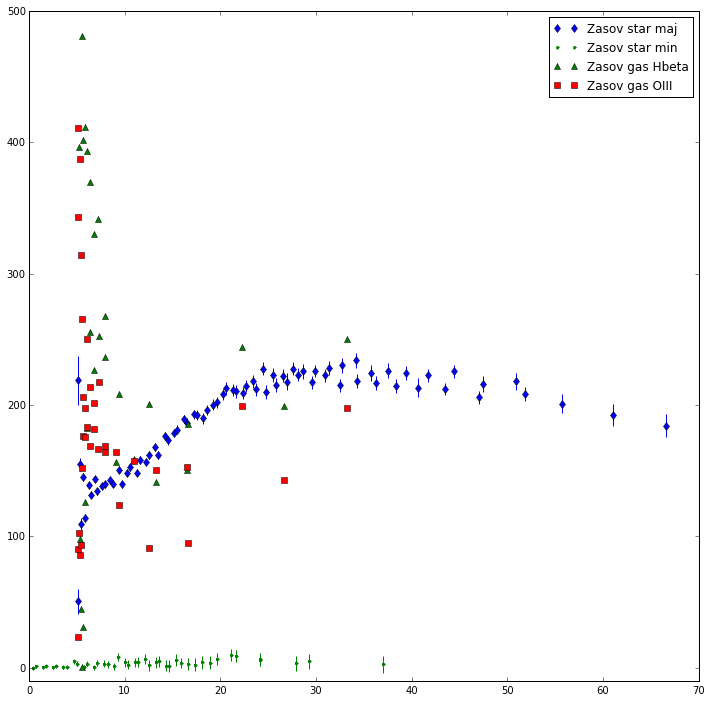

In [43]:
def incline_velocity(v, angle):
    return v / sin(angle * pi / 180)

# Переносит центр в (r0,v0) и перегибает кривую вращения, 
# а также исправляет за наклон если необходимо
def correct_rotation_curve(rdata, vdata, dvdata, r0, v0, incl):
    rdata_tmp = [abs(r-r0) for r in rdata]
    vdata_tmp = [incline_velocity(abs(v-v0), incl) for v in vdata]
    data = zip(rdata_tmp, vdata_tmp, dvdata)
    data.sort()
    return zip(*data)

# r_ma_b, vel_ma_b, e_vel_b = correct_rotation_curve(r_ma, vel_ma, e_vel_ma,  0.0, 1300.5, 90.)
r_ma_b, vel_ma_b, e_vel_b = correct_rotation_curve(r_ma1, vel_ma1, e_vel_ma1,  0., 0., 90.)
r_mi_b, vel_mi_b, e_vel_mi_b = correct_rotation_curve(r_mi, vel_mi, e_vel_mi,  0., 1276.5, 90.)

r_g_H_b, vel_g_H_b, e_vel_g_H_b = correct_rotation_curve(r_g_H1, vel_g_H1, e_vel_g_H1,  0., 0., 90.)
r_g_O_b, vel_g_O_b, e_vel_g_O_b = correct_rotation_curve(r_g_O1, vel_g_O1, e_vel_g_O1,  0., 0., 90.)

plt.plot(r_ma_b, vel_ma_b, 'd', label = 'Zasov star maj')
plt.errorbar(r_ma_b, vel_ma_b, yerr=e_vel_b, fmt='.', marker='.', mew=0, color='blue')
plt.plot(r_mi_b, vel_mi_b, '.', label = 'Zasov star min', color='green')
plt.errorbar(r_mi_b, vel_mi_b, yerr=e_vel_mi_b, fmt='.', marker='.', mew=0, color='green')
plt.plot(r_g_H_b, vel_g_H_b, '^', label = 'Zasov gas Hbeta')
plt.plot(r_g_O_b, vel_g_O_b, 's', label = 'Zasov gas OIII')
plt.ylim(-10, 500)
plt.legend()
plt.plot()

В дальнейшем используем только данные по звездам по большой оси, приблизим их полиномом, обрежем нефизические данные  добавим точку в нуле.

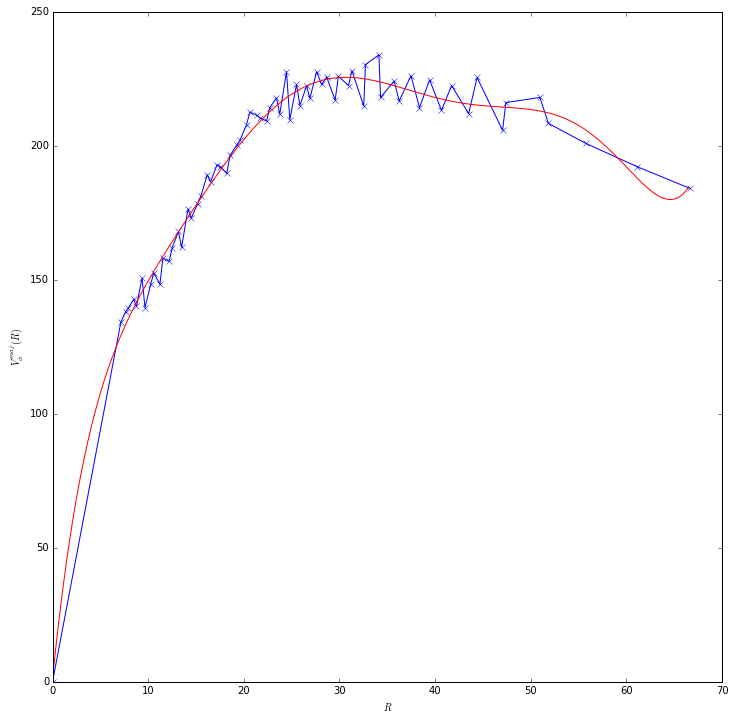

In [44]:
left_bord = 7.
def cut_left(x):
    return filter(lambda l: l > left_bord, x)

start_ind = r_ma_b.index(cut_left(r_ma_b)[0])
r_ma_b = (0.0,) + r_ma_b[start_ind:]
vel_ma_b = (0.0,) + vel_ma_b[start_ind:]
poly_star = poly1d(polyfit(r_ma_b, vel_ma_b, deg=7))

plt.plot(r_ma_b, vel_ma_b, 'x-', color='blue', markersize=6)
test_points = np.arange(0.0, max(r_ma_b), 0.1)
plt.plot(test_points, poly_star(test_points), '-', color='red')
plt.xlabel('$R$'); plt.ylim(0)
plt.ylabel('$V^{maj}_{\phi}(R)$')
plt.show()

In [45]:
os.chdir("C:\\Users\\root\\Dropbox\\RotationCurves\\PhD\\paper1\\text\\imgs")

np.save('n3245_maj_rot', zip(r_ma_b, vel_ma_b, e_vel_b))
np.save('n3245_rot_poly', zip(test_points, poly_star(test_points)))

os.chdir("C:\\science\\2FInstability\\data\\ngc3245")

Кривая вращения нам нужна для нахождения соотношения $\sigma_{\varphi}^{2}/\sigma_{R}^{2}$, которое описывается уравнением ${\displaystyle \sigma_{\varphi}^{2}/\sigma_{R}^{2}=0.5\left(1+\frac{R}{\bar{v}_{\varphi}}\frac{d\bar{v}_{\varphi}}{dR}\right)}$ (Binney & Tremaine, 1987) и приближается гладко функцией $f=0.5(1+e^{-R/R_{0}}),$ где $R_{0}$ --- характерный масштаб. 

${\bf Примечание:}$ Такое приближение оправдано следующими соображениями. Для равновесного диска верно уравнение, описанное выше. Для твердотельного участка вращения в центральных областях выражение в скобках равно 2, а $\sigma_{\varphi}^{2}/\sigma_{R}^{2}=1$. На плоском участке кривой вращения на периферии диска $\sigma_{\varphi}^{2}/\sigma_{R}^{2}\thickapprox0.5$. Функция $f$ как раз аппроксимирует такое поведение отношения $\sigma_{\varphi}^{2}/\sigma_{R}^{2}$.

Изобразим получившийся профиль $\sigma_{\varphi}^{2}/\sigma_{R}^{2}$, вычисляемый через производную полинома:

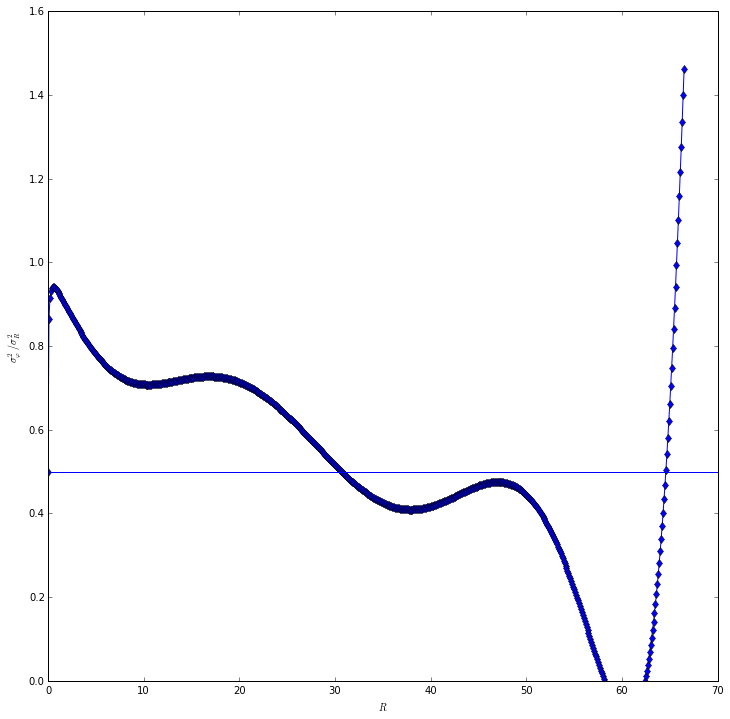

In [46]:
def sigPhi_to_sigR_real(R):
        return 0.5 * (1 + R*poly_star.deriv()(R) / poly_star(R))

plt.plot(test_points, [sigPhi_to_sigR_real(R) for R in test_points], 'd-', color='blue')
plt.axhline(y=0.5)
plt.axhline(y=0.0)
plt.xlabel('$R$')
plt.ylabel(r"$\sigma_{\varphi}^2/\sigma_{R}^2$")
plt.ylim(0)
plt.show()

Найдем теперь характерный масштаб $f=0.5(1+e^{-R/R_{0}})$:

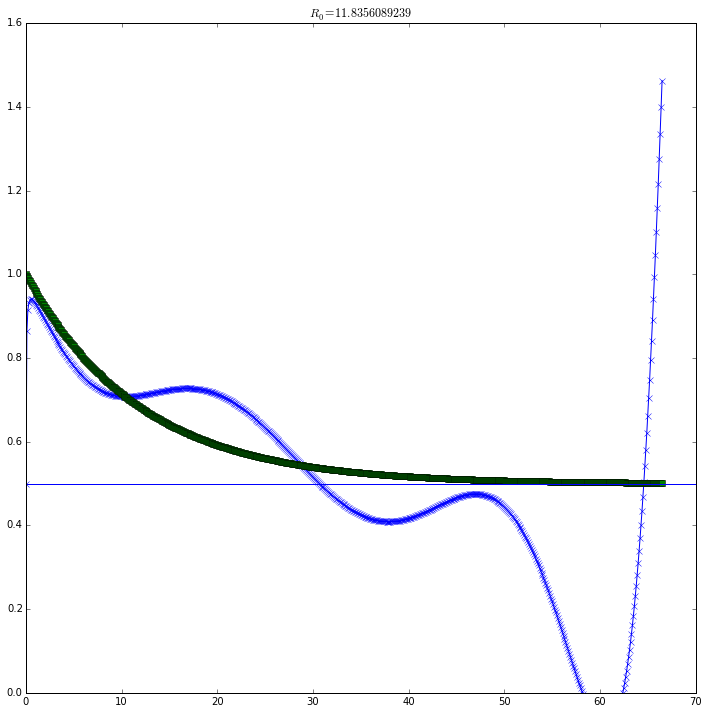

In [47]:
def f(R, Ro):
    return 0.5*(1 + np.exp( -R/Ro ))

xdata = test_points
ydata = sigPhi_to_sigR_real(xdata)

from scipy.optimize import curve_fit
popt, pcov = curve_fit(f, xdata, ydata, p0=[1.0])
Ro = popt[0]

plt.plot(xdata, ydata, 'x-')
plt.plot(xdata, [f(p, Ro) for p in xdata], 's')
plt.axhline(y=0.5)
plt.axhline(y=0.0)
plt.title('$R_{0} = %s $' % Ro)
plt.ylim(0)
plt.show()

Теперь знаем значение отношения $\sigma_{\varphi}^{2}/\sigma_{R}^{2}$ в любой точке, заведем соответствующую функцию:

In [48]:
def sigPhi_to_sigR(R):
    return sqrt(f(R, Ro))

Построим графики дисперсий скоростей на луче зрения вдоль большой и малой оси ($\sigma_{los}^{maj}$ и $\sigma_{los}^{min}$), пересчитав расстояния для большой оси как было описано ранее:  

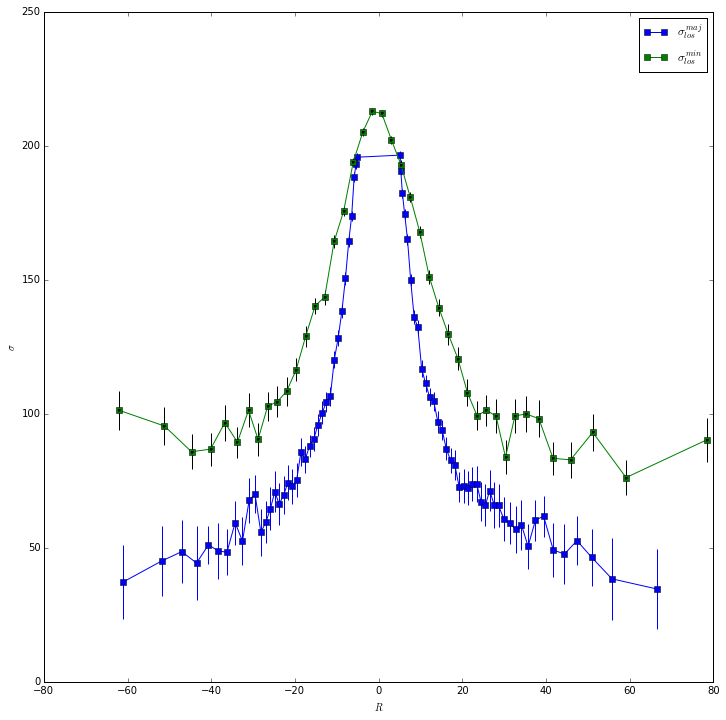

In [49]:
# Исправляем значения вдоль малой оси на синус угла:    
# def correct_min(R):    
#     return R / cos(incl * pi / 180) 

# r_mi_extend = map(correct_min, r_mi)
    
plt.plot(r_ma1, sig_ma, 's-', label='$\sigma_{los}^{maj}$')
plt.errorbar(r_ma1, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='blue')
plt.plot(r_mi_extend, sig_mi, 's-', label='$\sigma_{los}^{min}$')
plt.errorbar(r_mi_extend, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='black')
plt.xlabel('$R$')
plt.ylabel('$\sigma$')
plt.legend()
plt.show()

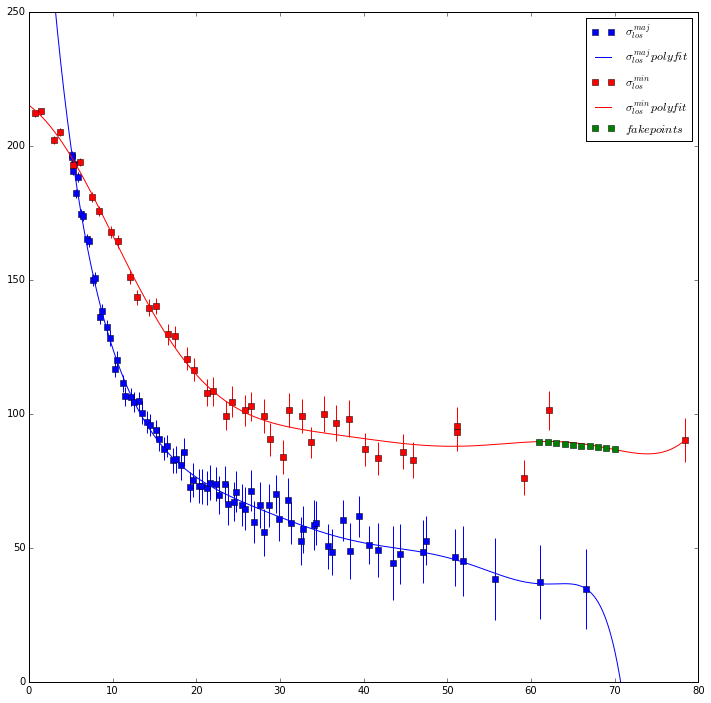

In [50]:
bind_curve = lambda p: (abs(p[0]), abs(p[1]), p[2])
# sig_maj_data = zip(r_ma, sig_ma, e_sig_ma)
# sig_maj_data = map(bind_curve, sig_maj_data)
# sig_maj_data.sort()
# radii_maj, sig_maj_p, e_sig_maj_p = zip(*sig_maj_data) 

# poly_sig_maj = poly1d(polyfit(radii_maj, sig_maj_p, deg=9))

sig_maj_data = zip(r_ma1, sig_ma, e_sig_ma)
sig_maj_data = map(bind_curve, sig_maj_data)
sig_maj_data.sort()
radii_maj, sig_maj_p, e_sig_maj_p = zip(*sig_maj_data) 

poly_sig_maj = poly1d(polyfit(radii_maj, sig_maj_p, deg=9))


sig_min_data = zip(r_mi_extend, sig_mi, e_sig_mi)
sig_min_data = map(bind_curve, sig_min_data)
sig_min_data.sort()
radii_min, sig_min_p, e_sig_min_p = zip(*sig_min_data) 

# Добавляем лишние точки чтобы протянуть дальше
num_fake_points = 10; expscale = 300.0
fake_radii, fake_sig = zip(*[(60.0 + i, 90*exp(- i / expscale )) for i in range(1, num_fake_points+1)])
# fake_radii, fake_sig = (),()

poly_sig_min = poly1d(polyfit(radii_min + fake_radii, sig_min_p + fake_sig, deg=9))

points = np.arange(0, max(radii_min), 0.1)
plt.plot(radii_maj, sig_maj_p, 's', label='$\sigma_{los}^{maj}$', color='blue')
plt.errorbar(radii_maj, sig_maj_p, yerr=e_sig_maj_p, fmt='.', marker='.', mew=0, color='blue')
plt.plot(points, poly_sig_maj(points), label = '$\sigma_{los}^{maj} polyfit$', color='blue')
plt.plot(radii_min, sig_min_p, 's', label='$\sigma_{los}^{min}$', color='red')
plt.errorbar(radii_min, sig_min_p, yerr=e_sig_min_p, fmt='.', marker='.', mew=0, color='red')
plt.plot(points, poly_sig_min(points), label = '$\sigma_{los}^{min} polyfit$', color='red')
plt.plot(fake_radii, fake_sig, 'bs', color='green', label='$fake points$')
plt.legend()
plt.ylim(0, 250)
plt.show()

In [51]:
os.chdir("C:\\Users\\root\\Dropbox\\RotationCurves\\PhD\\paper1\\text\\imgs")

np.save('n3245_maj', zip(radii_maj, sig_maj_p, e_sig_maj_p))
np.save('n3245_min', zip(radii_min, sig_min_p, e_sig_min_p))
np.save('n3245_min_poly', zip(points, poly_sig_min(points)))
np.save('n3245_maj_poly', zip(points, poly_sig_maj(points)))

os.chdir("C:\\science\\2FInstability\\data\\ngc3245")

Посчитаем величину невязок для полученного приближения:

In [52]:
sqerr_maj = sum(power([poly_sig_maj(p[0]) - p[1] for p in sig_maj_data], 2))
sqerr_min = sum(power([poly_sig_min(p[0]) - p[1] for p in sig_min_data], 2))

print "Poly chi^2 for maj = %s, mean = %s" % (sqerr_maj, sqerr_maj / sig_maj_p.__len__())
print "Poly chi^2 for min = %s, mean = %s" % (sqerr_min, sqerr_min / sig_min_p.__len__())

Poly chi^2 for maj = 945.654732111, mean = 12.2812302872
Poly chi^2 for min = 1045.379644, mean = 24.8899915237


Методика восстановления профилей $\sigma_{R}(R)$, $\sigma_{\varphi}(R)$ и $\sigma_{z}(R)$ следующая. Представим, что $\sigma_{Z}/\sigma_{R} \equiv \alpha \equiv const$. Тогда, зная значения $\sigma_{\varphi}^{2}/\sigma_{R}^{2}=f(R)$ в каждой точке, получаем из уравнений, описанных выше: $$\sigma_{los,maj}^2=\sigma_R^2[f\sin^2i+\alpha^2\cos^2i]$$ $$\sigma_{los,min}^2=\sigma_R^2[\sin^2i+\alpha^2\cos^2i]$$
Представим теперь $\sigma_R(R)=\sigma_{R,0}\times F(R)$, где $F(0)=1$. Значение в квадратных скобках для $\sigma_{los,min}$ равно константе и, следуя предположению, получаем представление для дисперсии вдоль луча зрения для малой оси как $\sigma_{los,min}(R)=\sigma_{min,0}\times F(R)$. Очевидно $\sigma_{min,0} = \sigma_{los,min}(0)$, а значит мы знаем в каждой точке значение $F(R)=\sigma_{los,min(R)}/\sigma_{min,0}$. Описанная выше система уравнений вырождается в следующую:
$$\sigma_{los,maj}^2(R)=\frac{\sigma_{R,0}^2\sigma_{los,min}^2(R)[f\sin^2i+\alpha^2\cos^2i]}{\sigma_{min,0}^2}$$ $$\sigma_{min,0}^2=\sigma_{R,0}^2\sin^2i+\sigma_{R,0}^2\alpha^2\cos^2i$$
Сделаем замену: $\sigma_{R,0}^2\sin^2 i \equiv A,\ \sigma_{R,0}^2\cos^2 i\times \alpha^2 \equiv B$. Окончательно, имеем $N+1$ линейное уравнение для $N$ точек, которые можем решить МНК: 
$$\left\{
  \begin{array}{lr}
    \sigma_{los,maj}^2(R_j)\times \sigma_{min,0}^2 =\sigma_{los,min}^2(R_j)[Af(R_j)+B]\\
    \sigma_{min,0}^2=A+B
  \end{array}
\right.
$$

Однако это все было верно для случая несмещенной щели. Для нашего случая исходное уравнение для дисперсий вдоль большой оси меняется на  $$\sigma_{los,maj}^2(R_{obs})=\sigma_R^2(R)[f(R)\sin^2\theta+\cos^2\theta]\sin^2i + \alpha^2\sigma_R^2(R)\cos^2i,$$ Если ввести новую функцию $f^{\prime}(R, R_{obs})=f(R)\sin^2\theta+\cos^2\theta$, то в тех же переменных, что и выше система для МНК будет записана как 
$$\left\{
  \begin{array}{lr}
    \sigma_{los,maj}^2(R_{obs}(R_j))\times \sigma_{min,0}^2 =\sigma_{los,min}^2(R_j)[Af^{\prime}(R_j)+B]\\
    \sigma_{min,0}^2=A+B
  \end{array}
\right.
$$

Попробуем поискать точки, в которых МНК решается лучше всего:

In [53]:
#Новая функция f'
def f_prime(R_real, R_obs):
    return f(R_real, Ro)*sin_theta(R_obs)**2 + cos_theta(R_obs)**2
    
#Как вычислять ошибку 
def residuals(params, xdata, ydata):
            return (ydata - np.dot(xdata, params))

#Начальное приближение (А,В)
x0 = [1000, 1000]

#Восстановление первоначальных неизвестных
def physical_unknowns(A, B):
    sig_R_0 = round( sqrt(A) / sin(incl*pi/180), 3)
    alpha = round( sqrt(B)/ (cos(incl*pi/180) * sig_R_0), 3)
    return (sig_R_0, alpha)

#Значение sig_los_min в 0
sig_min_0 = poly_sig_min(0.)

Ns = [50, 75, 100]

right_max = 60.

#Шаг сетки по расстоянию
dx = 2.

#Минимальный размер отрезка, на котором ищем ответ
min_size = 20.

lefts = np.arange(0, right_max, dx)

best = []

for n in Ns:
    result_for_N = []
    for left in lefts:
        rights = np.arange(left+min_size, right_max, dx)
        for right in rights:
            r_points_observ = np.arange(left, right, (right-left)/n)
            r_points_real = map(correct_radii_maj, r_points_observ)
            eq_left = np.concatenate( ([sig_min_0**2], 
                              [poly_sig_maj(p)**2 * sig_min_0**2  for p in r_points_observ]) )
            eq_right = np.transpose(np.array([
                            np.concatenate(([1.0],
                                               [poly_sig_min(R)**2 * f_prime(R, Rg) for (R, Rg) 
                                                in zip(r_points_real, r_points_observ)])),
                            np.concatenate(([1.0],
                                                [poly_sig_min(R)**2 for R in r_points_real]))]))
            solution = scipy.optimize.leastsq(residuals, x0, args=(eq_right, eq_left))[0]
            A, B = solution[0], solution[1]
            chi2 = sum(power(residuals(solution, eq_right, eq_left), 2))/n
            if A > 0 and B > 0:
                result_for_N.append([chi2, left, right-left, A, B])
    if result_for_N.__len__() > 0:
        result_for_N.sort()
        Z,X,Y,A,B = zip(*result_for_N)
        print "For N=%s top-10 best results:" % n
        for ind in range(0, min(10, Z.__len__())):
            prin = (ind+1, Z[ind], X[ind], X[ind]+Y[ind]) + physical_unknowns(A[ind], B[ind])
            print "\t%s place: chi2 = %s in range [%s:%s]; sig_R_0 = %s alpha = %s" % prin
        if best.__len__() == 0 or best[0] > Z[0]:
            best = [Z[0], X[0], Y[0], n]

if best.__len__() > 0:
    print "Best of the best: N=%s chi2 = %s on range[%s:%s]" % (best[3], best[0], best[1], best[2]+best[1])

For N=50 top-10 best results:
	1 place: chi2 = 4.15897799438e+13 in range [12.0:32.0]; sig_R_0 = 200.73 alpha = 0.547
	2 place: chi2 = 4.34299840316e+13 in range [14.0:34.0]; sig_R_0 = 192.783 alpha = 0.69
	3 place: chi2 = 5.24955320743e+13 in range [12.0:34.0]; sig_R_0 = 208.448 alpha = 0.339
	4 place: chi2 = 6.8999014176e+13 in range [14.0:36.0]; sig_R_0 = 207.262 alpha = 0.348
For N=75 top-10 best results:
	1 place: chi2 = 4.03934850302e+13 in range [12.0:32.0]; sig_R_0 = 199.957 alpha = 0.563
	2 place: chi2 = 4.4385062017e+13 in range [14.0:34.0]; sig_R_0 = 193.204 alpha = 0.682
	3 place: chi2 = 5.1988820261e+13 in range [12.0:34.0]; sig_R_0 = 207.881 alpha = 0.355
	4 place: chi2 = 7.02488152706e+13 in range [14.0:36.0]; sig_R_0 = 207.885 alpha = 0.329
For N=100 top-10 best results:
	1 place: chi2 = 3.98148534947e+13 in range [12.0:32.0]; sig_R_0 = 199.571 alpha = 0.571
	2 place: chi2 = 4.48650031089e+13 in range [14.0:34.0]; sig_R_0 = 193.424 alpha = 0.678
	3 place: chi2 = 5.17587

In [54]:
#Обрезаем данные по x > r_eff
r_eff = 12.0

#Правая граница
r_max = 32.0

#Количество точек N и сами точки
N = 100
radii_points_observ = np.arange(r_eff, r_max, (r_max-r_eff)/N)

#Пересчитываем точки в настоящие, чтобы уметь считать углы
radii_points_real = map(correct_radii_maj, radii_points_observ)

#Уравнения:  одно для min и N для maj
#Левая часть:
eq_left = np.concatenate( ([sig_min_0**2], 
                              [poly_sig_maj(p)**2 * sig_min_0**2  for p in radii_points_observ]) )
#Правая часть:
eq_right = np.transpose(
            np.array([
                np.concatenate(([1.0],
                                   [poly_sig_min(R)**2 * f_prime(R, Rg) for (R, Rg) 
                                    in zip(radii_points_real, radii_points_observ)])),
                np.concatenate(([1.0],
                                    [poly_sig_min(R)**2 for R in radii_points_real]))]))

# МНК для получившихся уравнений:
solution = scipy.optimize.leastsq(residuals, x0, args=(eq_right, eq_left))[0]
A, B = solution[0], solution[1]

chi2 = sum(power(residuals(solution, eq_right, eq_left), 2))/N
        
print 'Solution: A = %s, B = %s' % (A, B)
print 'Chi^2:', chi2

#Подставить в уравнение в какой-нибудь точке:
# rrr = 25.0
# print (poly_sig_maj(rrr)**2) * sig_min_0**2 - (poly_sig_min(rrr)**2) * (A*f(rrr, Ro)+B)

Solution: A = 30992.5266531, B = 2876.59857197
Chi^2: 3.98148534947e+13


Теперь восстановим исходные неизвестные - $\alpha$ и $\sigma_{R, 0}$: 

In [55]:
sig_R_0 = round( sqrt(A) / sin(incl*pi/180), 3)
alpha = round( sqrt(B)/ (cos(incl*pi/180) * sig_R_0), 3)

# sig_R_0 = 255.
# alpha = 0.01

print "sig_R_0 = %s, alpha = %s" % (sig_R_0, alpha)

sig_R_0 = 199.571, alpha = 0.571


Построим полученные профили дисперсий скоростей:

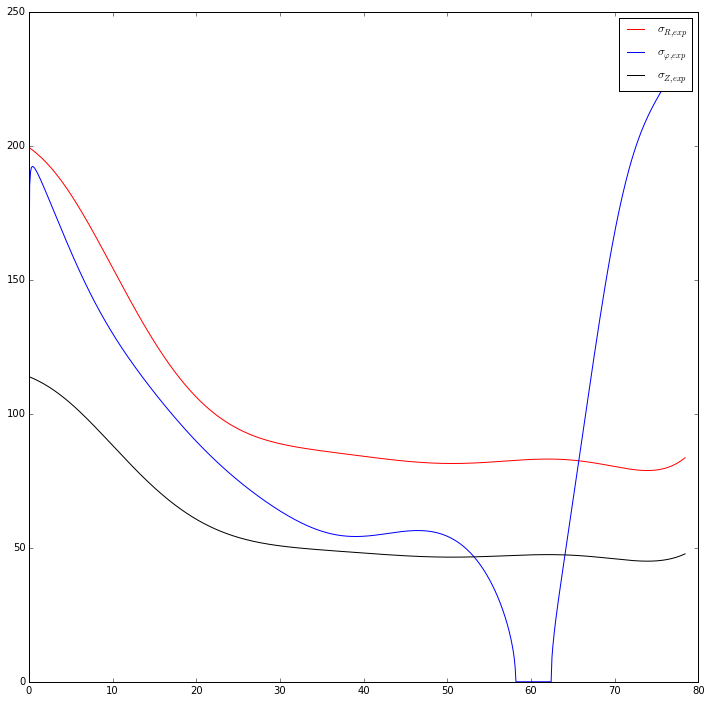

In [56]:
def sigR_exp(R):
    return sig_R_0*poly_sig_min(R)/sig_min_0

def sigZ_exp(R):
    return alpha * sigR_exp(R)

def sigPhi_exp(R):
    if sigPhi_to_sigR_real(R) > 0:
        return sqrt(sigPhi_to_sigR_real(R)) * sigR_exp(R)
    else:
        return 0


plt.plot(points, [sigR_exp(R) for R in points], '-', color='red', label='$\sigma_{R, exp}$')
plt.plot(points, [sigPhi_exp(R) for R in points], '-', color='blue', label=r'$\sigma_{\varphi, exp}$')
plt.plot(points, [sigZ_exp(R) for R in points], '-', color='black', label='$\sigma_{Z, exp}$')
plt.legend()
plt.show()

И восстановим профили $\sigma_{los}^{maj}$ и $\sigma_{los}^{min}$. Связь профилей описывается следующими уравнениями: $$\sigma_{los,maj}^2=\sigma_{\varphi}^2\sin^2i+\sigma_Z^2\cos^2i$$ $$\sigma_{los,min}^2=\sigma_R^2\sin^2i+\sigma_Z^2\cos^2i$$

Однако надо не забыть исправить $\sigma^{maj}_{los}$: $$\sigma_{los,maj}^2(R_{obs})=[\sigma_R^2(R)\cos^2\theta + \sigma^2_{\varphi}(R)\sin^2\theta]\sin^2i + \sigma^2_{Z}(R)\cos^2i$$

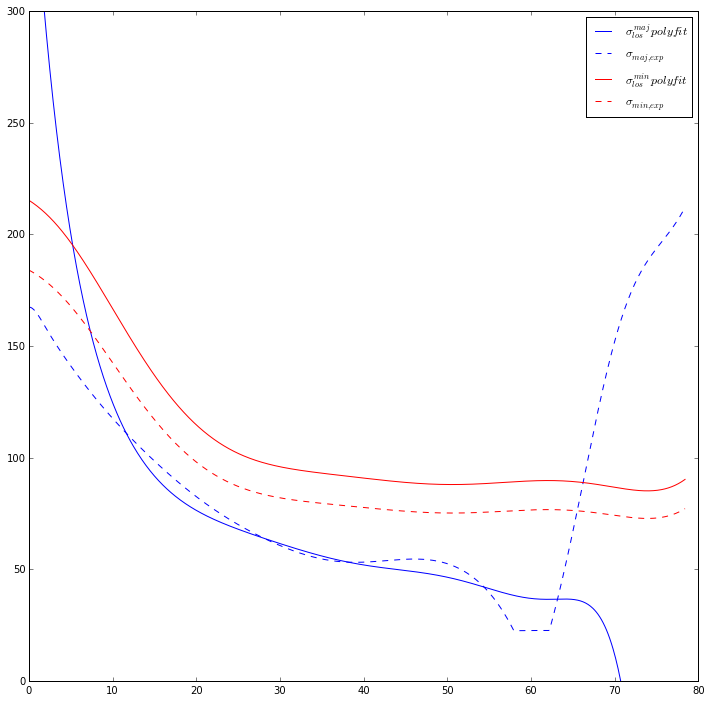

In [57]:
# def sig_min_exp(R):
#     return sqrt(sigR_exp(R)**2 * sin_i**2 + sigZ_exp(R)**2 * cos_i**2)

def sig_maj_exp(R_real, R_obs):
    return sqrt((sigR_exp(R_real)**2 * cos_theta(R_obs)**2 + sigPhi_exp(R_real)**2 * sin_theta(R_obs)**2) * sin_i**2 + 
                sigZ_exp(R_real)**2 * cos_i**2)

def sig_min_exp(R):
    return sig_R_0*poly_sig_min(R)/sig_min_0 * sqrt(sin_i**2 + alpha**2 * cos_i**2)
#     return sqrt(sigR_exp(R)**2 * sin(incl*pi/180)**2 + sigZ_exp(R)**2 * cos(incl*pi/180)**2)

points_obs = np.arange(0, max(radii_min), 0.1)
points_real = map(correct_radii_maj, points_obs)

# points_original = map(lambda l: g(l)*l, points)

plt.plot(points, poly_sig_maj(points), '-', label = '$\sigma_{los}^{maj} polyfit$', color='blue')
plt.plot(points_obs, [sig_maj_exp(Rr, Robs) for (Rr, Robs) in zip(points_real, points_obs)], 
         '--', color='blue', label='$\sigma_{maj, exp}$')
plt.plot(points, poly_sig_min(points), '-', label = '$\sigma_{los}^{min} polyfit$', color='red')
plt.plot(points, [sig_min_exp(R) for R in points], '--', color='red', label='$\sigma_{min, exp}$')
plt.legend()
plt.ylim(0, 300)
plt.show()

И посчитаем невязки для восстановленного профиля:

In [58]:
ppp =  map(lambda l: abs(l), r_ma)
ppp.sort()

sqerr_maj_final = sum(power([sig_maj_exp(p[0], p[1]) - p[2] for p in zip(radii_maj, ppp, sig_maj_p)], 2))
sqerr_min_final = sum(power([sig_min_exp(p[0]) - p[1] for p in sig_min_data], 2))

print "Poly chi^2 for maj = %s, mean = %s" % (sqerr_maj_final, sqerr_maj_final / sig_maj_p.__len__())
print "Poly chi^2 for min = %s, mean = %s" % (sqerr_min_final, sqerr_min_final / sig_min_p.__len__())

Poly chi^2 for maj = 14819.6594602, mean = 192.463109872
Poly chi^2 for min = 16480.8888173, mean = 392.402114697


Заметим, что можно было не решать систему МНК, а честно разрешить систему из двух уравнений $$\left\{
  \begin{array}{lr}
    \sigma_{los,maj}^2(R_{obs}(R_j))\times \sigma_{min,0}^2 =\sigma_{los,min}^2(R_j)[Af^{\prime}(R_j)+B]\\
    \sigma_{min,0}^2=A+B
  \end{array}
\right.
$$ относительно $A$ и $B$ для почти любого $R_j$ (а лучше даже относительно начальных неизвестных - $\sigma_{R,0}$ и $\alpha$).
Решение: $$\sigma_{R,0}^2 = \frac{\sigma_{min,0}^2}{\sin^2 i}\times\frac{1}{f^{\prime}(R)-1}\times(P(R, R_{obs})-1)$$ $$\alpha^2 = \tan^2 i\frac{f^{\prime}(R) - P(R, R_{obs})}{P(R, R_{obs})-1},$$ $$P(R, R_{obs})=\frac{\sigma_{los,maj}^2(R_{obs})}{\sigma_{los, min}^2(R)}$$ Имеет смысл также искать не $\alpha$, а $\alpha\cdot\sigma_{R,0}=\sigma_{Z,0}$.

In [59]:
def P(R, R_obs):
    """Отношение maj к min, как описано выше"""
    return (poly_sig_maj(R_obs)/poly_sig_min(R))**2

def direct_solve_A(R, R_obs):
    """Аналитически находим значение sig_R_0 для уравнения в точке R"""
    res = sig_min_0**2 * (P(R, R_obs) - 1) / (sin_i**2 * (f_prime(R, R_obs) - 1))
    return sqrt(res) if res > 0 else 0

def direct_solve_B(R, R_obs):
    """Аналитически находим значение alpha для уравнения в точке R"""
    res = (f_prime(R, R_obs) - P(R, R_obs))/(P(R, R_obs) - 1) * (sin_i/cos_i)**2
    return sqrt(res) if res > 0 else 0

def direct_find_sig_R_0(R, R_obs):
    return direct_solve_A(R, R_obs)

def direct_find_sig_Z_0(R, R_obs):
    return direct_solve_A(R, R_obs) * direct_solve_B(R, R_obs)

Найдем значения $\sigma_{R,0}$ и $\sigma_{Z,0}$ для всех точек на большой оси:

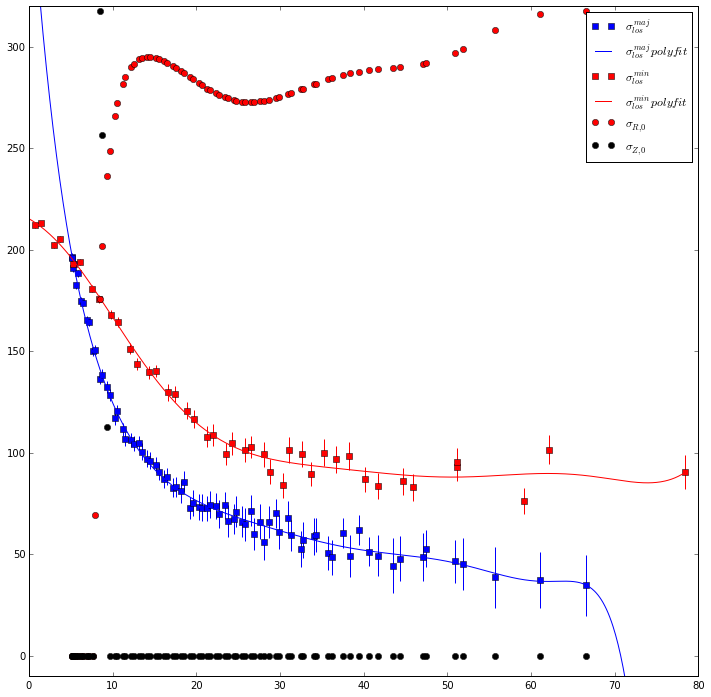

In [60]:
p_r = radii_maj
p_obs = map(lambda l: abs(l), r_ma)
p_obs.sort()

direct_sigR0 = map(direct_find_sig_R_0, p_r, p_obs)
direct_sigZ0 = map(direct_find_sig_Z_0, p_r, p_obs)

plt.plot(radii_maj, sig_maj_p, 's', label='$\sigma_{los}^{maj}$', color='blue')
plt.errorbar(radii_maj, sig_maj_p, yerr=e_sig_maj_p, fmt='.', marker='.', mew=0, color='blue')
plt.plot(points, poly_sig_maj(points), label = '$\sigma_{los}^{maj} polyfit$', color='blue')
plt.plot(radii_min, sig_min_p, 's', label='$\sigma_{los}^{min}$', color='red')
plt.errorbar(radii_min, sig_min_p, yerr=e_sig_min_p, fmt='.', marker='.', mew=0, color='red')
plt.plot(points, poly_sig_min(points), label = '$\sigma_{los}^{min} polyfit$', color='red')

plt.plot(p_r, direct_sigR0, 'o', color='r', label='$\sigma_{R,0}$')
plt.plot(p_r, direct_sigZ0, 'o', color='k', label='$\sigma_{Z,0}$')

plt.legend()
plt.ylim(-10, 320)
plt.show()

Как видно - хорошо восстанавливаются значения $\sigma_{R,0}$ - лежат относительно одной прямой, найдем их среднее:

In [61]:
#Обрежем по 15
q=15.
ind_q = p_r.index(filter(lambda l: l > q, p_r)[0])

poly_q = poly1d(polyfit(p_r[ind_q:], direct_sigR0[ind_q:], deg=0))
print "sig_R poly mean = %s" % poly_q[0]

sig_R poly mean = 284.608074884


Попробуем найти $\alpha$ как и раньше - решением избыточной линейной системы. Для этого вспомним уравнения: $$\sigma_{los,maj}^2(R_{obs})=\frac{\sigma_{R,0}^2\sigma_{los,min}^2(R)[f^{\prime}\sin^2i+\alpha^2\cos^2i]}{\sigma_{min,0}^2}$$ $$\sigma_{min,0}^2=\sigma_{R,0}^2\sin^2i+\sigma_{R,0}^2\alpha^2\cos^2i$$ Как мы видим, получается очевидная линейная система относительно $\alpha^2$.

In [62]:
sig_R_0 = poly_q[0]

def residuals(param, xdata, ydata):
            return (ydata - xdata*param)

x0 = [1.]
r_eff = 10.0
r_max = 40.0
N = 30
radii_points_observ = np.arange(r_eff, r_max, (r_max-r_eff)/N)
radii_points_real = map(correct_radii_maj, radii_points_observ)

#Уравнения - N штук для maj
#Левая часть:
eq_left = np.array([poly_sig_maj(Rg)**2 * sig_min_0**2 - 
                               poly_sig_min(R)**2 * f_prime(R, Rg) * sig_R_0**2 * sin_i**2
                               for (R, Rg) in zip(radii_points_real, radii_points_observ)])
#Правая часть:
eq_right = np.array([poly_sig_min(R)**2 * sig_R_0**2 * cos_i**2 for R in radii_points_real])


# МНК для получившихся уравнений:
solution = scipy.optimize.leastsq(residuals, x0, args=(eq_right, eq_left))[0]
A = solution[0]

chi2 = sum(power(residuals(solution, eq_right, eq_left), 2))/N
        
print 'Solution: alpha^2 = %s' % A
print 'Chi^2:', chi2

Solution: alpha^2 = -0.93448824122
Chi^2: 2.81292205721e+14


Не решается.

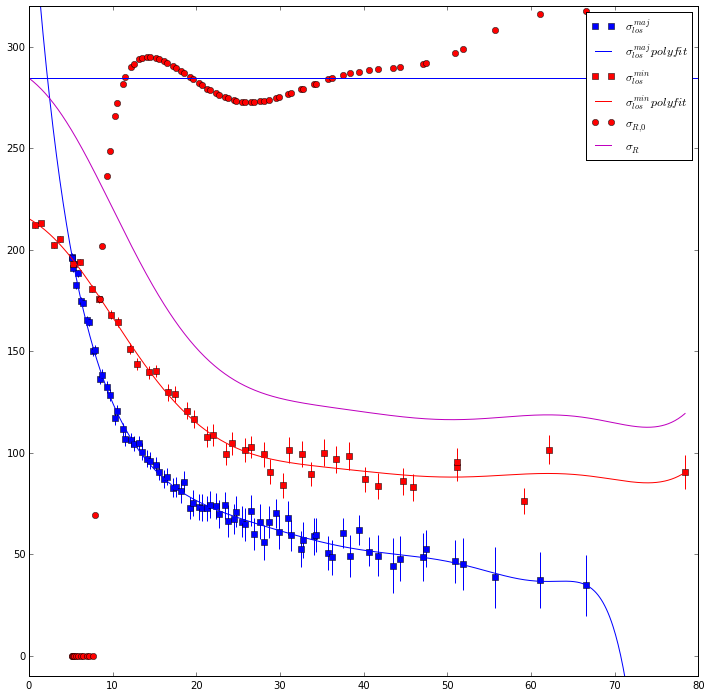

In [63]:
plt.plot(radii_maj, sig_maj_p, 's', label='$\sigma_{los}^{maj}$', color='blue')
plt.errorbar(radii_maj, sig_maj_p, yerr=e_sig_maj_p, fmt='.', marker='.', mew=0, color='blue')
plt.plot(points, poly_sig_maj(points), label = '$\sigma_{los}^{maj} polyfit$', color='blue')
plt.plot(radii_min, sig_min_p, 's', label='$\sigma_{los}^{min}$', color='red')
plt.errorbar(radii_min, sig_min_p, yerr=e_sig_min_p, fmt='.', marker='.', mew=0, color='red')
plt.plot(points, poly_sig_min(points), label = '$\sigma_{los}^{min} polyfit$', color='red')

plt.plot(p_r, direct_sigR0, 'o', color='r', label='$\sigma_{R,0}$')
plt.axhline(y=sig_R_0)
# plt.plot(points, [sig_min_exp(R) for R in points], '--', color='red', label='$\sigma_{min, exp}$')

#Строим полученный на основе среднего профиль sig_R
plt.plot(points, poly_sig_min(points)*sig_R_0/sig_min_0, label = '$\sigma_R$', color='m')

plt.legend()
plt.ylim(-10, 320)
plt.show()

Как мы видим, значения профиля дисперсии $\sigma_R(R)$ восстанавливаются довольно надежно, однако оказываются по-видимому больше реальных и поэтому не получается восстановить профиль в вертикальном направлении. Попробуем оценить, насколько этот вклад оказывается переоценен в данном случае. Известно, что отношение $\sigma_Z/\sigma_R$ не может быть меньше некоего порогового значения, в противном случае галактика будет неустойчива к осесимметричным изгибным возмущениям плотности. Многие авторы оценивали эту величину, в том числе Засов, однако последния статья Сотниковой и Радионова "Bending instability in galactic discs. Advocacy of the linear theory" (2013, http://arxiv.org/abs/1306.5975) продемонстрировала, что искомое попроговое значение близко к таковому, полученному из линейной теории Тумре в 1966 год и равно примерно 0.3. Чем это ценно для нас? Если мы примем, что $\frac{\sigma_Z}{\sigma_R} \gtrsim 0.3,$ то, исходя из уравнения $\sigma_{los,min}^2=\sigma_R^2\sin^2i+\sigma_Z^2\cos^2i$ можем получить оценку сверху на значения радиальной дисперсии: $$\frac{\sigma_{los,min}}{\sqrt{\sin^2i+0.09\cos^2i}} \gtrsim \sigma_R$$ Также аналогичную оценку, только чуть более сложную, можно сделать и для данных вдоль большой оси.


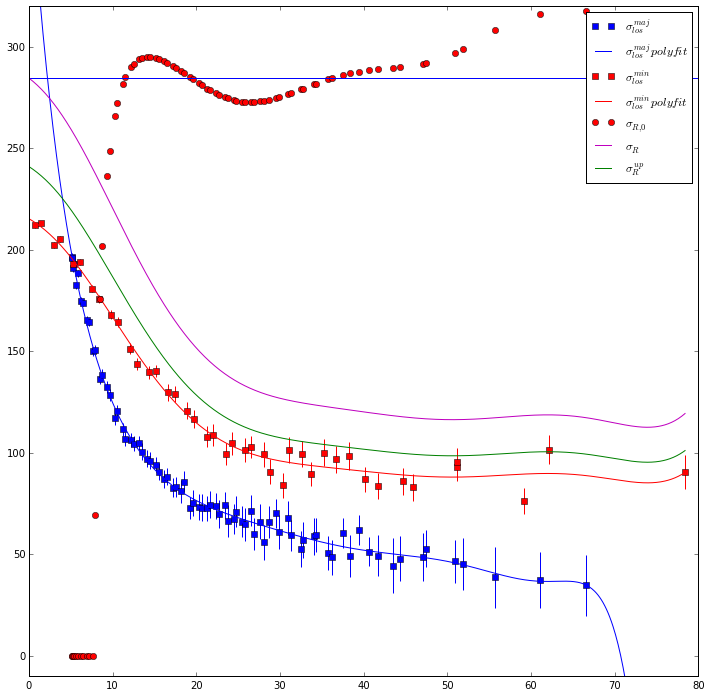

In [64]:
def sig_R_upper_lim(R):
    """Оценка сверху на sigR(R)"""
    return poly_sig_min(R)/sqrt(sin_i**2 + 0.09*cos_i**2)

plt.plot(radii_maj, sig_maj_p, 's', label='$\sigma_{los}^{maj}$', color='blue')
plt.errorbar(radii_maj, sig_maj_p, yerr=e_sig_maj_p, fmt='.', marker='.', mew=0, color='blue')
plt.plot(points, poly_sig_maj(points), label = '$\sigma_{los}^{maj} polyfit$', color='blue')
plt.plot(radii_min, sig_min_p, 's', label='$\sigma_{los}^{min}$', color='red')
plt.errorbar(radii_min, sig_min_p, yerr=e_sig_min_p, fmt='.', marker='.', mew=0, color='red')
plt.plot(points, poly_sig_min(points), label = '$\sigma_{los}^{min} polyfit$', color='red')

plt.plot(p_r, direct_sigR0, 'o', color='r', label='$\sigma_{R,0}$')
plt.axhline(y=sig_R_0)
plt.plot(points, poly_sig_min(points)*sig_R_0/sig_min_0, label = '$\sigma_R$', color='m')
plt.plot(points, [sig_R_upper_lim(R) for R in points], label = '$\sigma_R^{up}$', color='g')

plt.legend()
plt.ylim(-10, 320)
plt.show()

Как видим, значения действительно оказались переоценены минимум на 40 км/c. Давайте ради интереса попробуем восстановить эллипсоид скоростей и исходные профили, исходя из условия об маржинальной устойчивости диска относительно изгибных возмущений: 

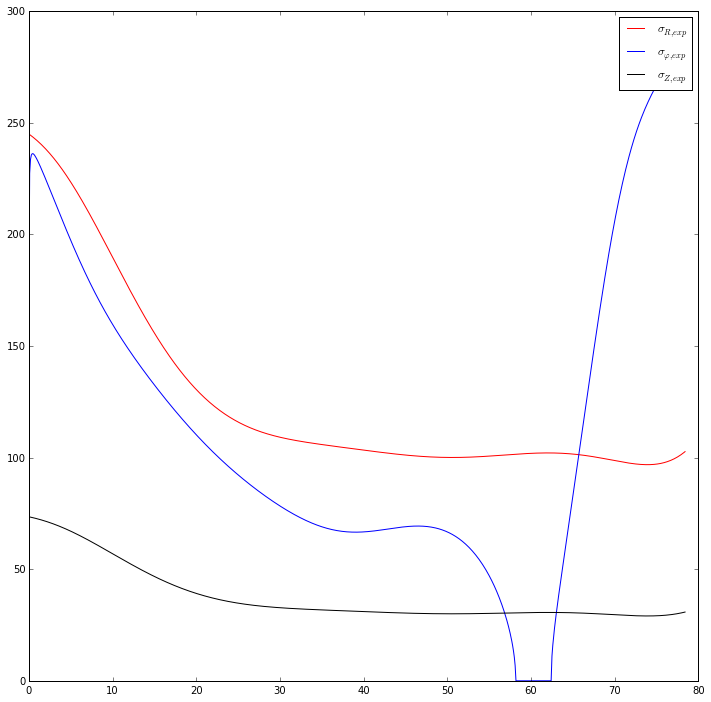

In [65]:
sig_R_0 = 245.
alpha = 0.3

plt.plot(points, [sigR_exp(R) for R in points], '-', color='red', label='$\sigma_{R, exp}$')
plt.plot(points, [sigPhi_exp(R) for R in points], '-', color='blue', label=r'$\sigma_{\varphi, exp}$')
plt.plot(points, [sigZ_exp(R) for R in points], '-', color='black', label='$\sigma_{Z, exp}$')
plt.legend()
plt.show()

Восстановленные исходные $los$ профили, с учетом сложной зависимости для $\sigma_{los}^{maj}$:

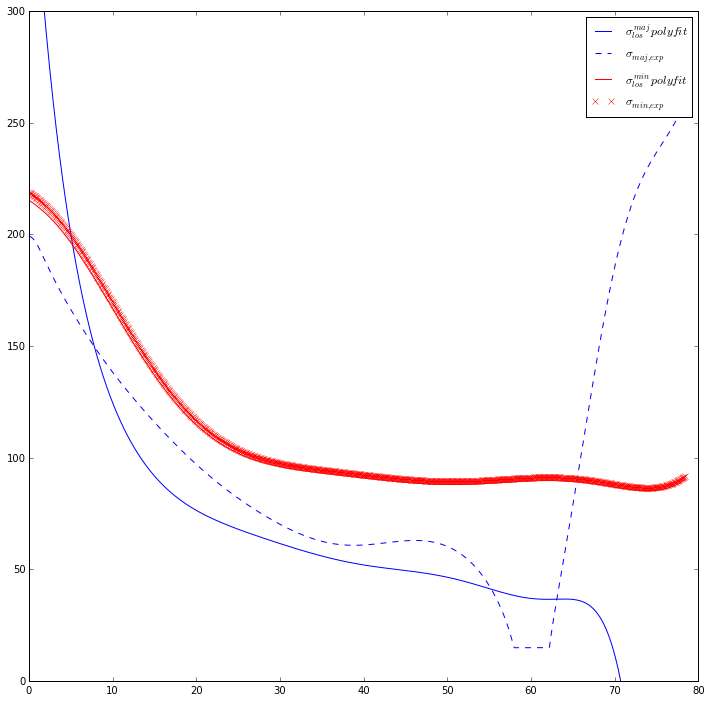

In [66]:
plt.plot(points, poly_sig_maj(points), '-', label = '$\sigma_{los}^{maj} polyfit$', color='blue')
plt.plot(points_obs, [sig_maj_exp(Rr, Robs) for (Rr, Robs) in zip(points_real, points_obs)], 
         '--', color='blue', label='$\sigma_{maj, exp}$')
plt.plot(points, poly_sig_min(points), '-', label = '$\sigma_{los}^{min} polyfit$', color='red')
plt.plot(points, [sig_min_exp(R) for R in points], 'x', color='red', label='$\sigma_{min, exp}$')
plt.legend()
plt.ylim(0, 300)
plt.show()

То, что давно хотелось - построим картинки для разных значений $\alpha$ и $\sigma_{R,0}$:

In [67]:
alphas = np.arange(0.1, 1.2, 0.03)
sigmas = np.arange(100.0, 400, 3.)

r_ma_bind = [abs(R) for R in r_ma]
r_ma_bind.sort()

def calc_chi2_normal(obs, obserr, predicted):
    return sum([(o-p)**2/err**2 for (o,p,err) in zip(obs, predicted, obserr)])/len(obs)

def compute_chi2_maps(alphas=(), sigmas=()):
    '''Вычисляем все изображения, чтобы потом только настройки менять'''
    image_min = np.random.uniform(size=(len(sigmas), len(alphas)))
    image_maj = np.random.uniform(size=(len(sigmas), len(alphas)))
    image = np.random.uniform(size=(len(sigmas), len(alphas)))
    for i,si in enumerate(sigmas):
        for j,al in enumerate(alphas):
            global alpha, sig_R_0
            alpha = al
            sig_R_0 = si
#             sqerr_maj = sum(power([sig_maj_exp(Robs, p[0]) - p[1] for 
#                                    (Robs, p) in zip(r_ma_bind, sig_maj_data)], 2))/len(sig_maj_data)
#             sqerr_min = sum(power([sig_min_exp(p[0]) - p[1] for p in sig_min_data], 2))/len(sig_min_data)
            sqerr_maj = calc_chi2_normal(sig_maj_p, e_sig_maj_p, [sig_maj_exp(Robs, p[0]) for 
                                   (Robs, p) in zip(r_ma_bind, sig_maj_data)])
            sqerr_min = calc_chi2_normal(sig_min_p, e_sig_min_p, [sig_min_exp(r) for r in radii_min])
            sqerr_sum = 0.5*sqerr_maj+0.5*sqerr_min
            image[i][j] = sqerr_sum
            image_maj[i][j] = sqerr_maj
            image_min[i][j] = sqerr_min
    return image, image_maj, image_min


pics_path = '.\\pics\\'
if not os.path.exists(pics_path):
    os.makedirs(pics_path)
if os.path.isfile(pics_path + 'chi2_map.npy'):
    image = np.load(pics_path + "chi2_map.npy")
    image_maj = np.load(pics_path + "chi2_map_maj.npy")
    image_min = np.load(pics_path + "chi2_map_min.npy")
else:
    image, image_maj, image_min = compute_chi2_maps(alphas=alphas, sigmas=sigmas)
    np.save(pics_path + 'chi2_map', image)
    np.save(pics_path + 'chi2_map_maj', image_maj)
    np.save(pics_path + 'chi2_map_min', image_min)

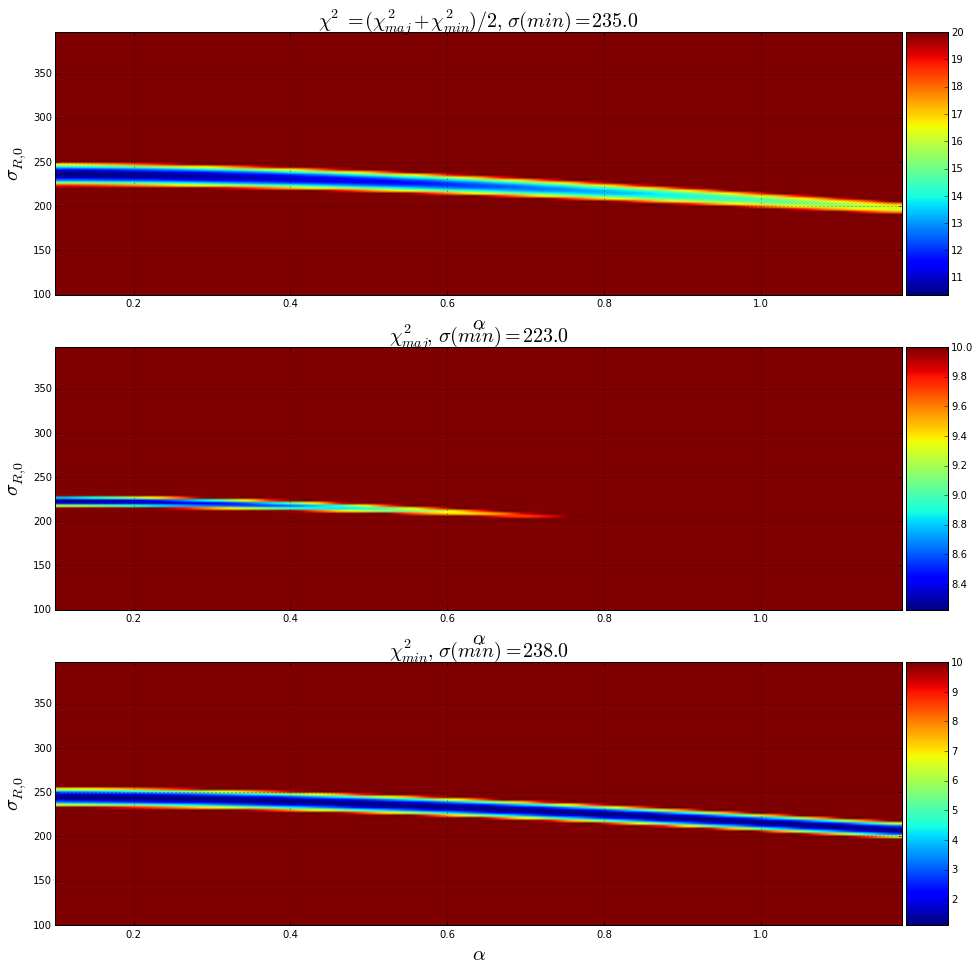

In [68]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_chi2_map(image, ax, log_scale=False, title='$\chi^2$', is_contour=False, vmax=0.):
    '''Рисуем получившиеся карты.
    Colormaps: http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps'''
    if image is not None:
        if log_scale:
            image_log = np.apply_along_axis(np.log, 1, image)
            vmax = image_log.max()
        else:
            image_log = image
        if is_contour:
            norm = cm.colors.Normalize(vmax=image.max(), vmin=-image.max())
            cmap = cm.PRGn
            levels = np.linspace(start=image_log.min(), stop=vmax, num=10)
            cset=ax.contour(image_log, levels, hold='on', colors = 'k', origin='lower', extent=[alphas[0],alphas[-1],sigmas[0],sigmas[-1]])
        im = ax.imshow(image_log, cmap='jet', vmin=image_log.min(), vmax=vmax, interpolation='spline16', 
                   origin="lower", extent=[alphas[0], alphas[-1],sigmas[0],sigmas[-1]], aspect="auto")
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)
        min_sigma = sigmas[int(np.where(image == image.min())[0])]        
        ax.set_title(title + '$,\ \sigma(min)=%s$' % min_sigma, size=20.)
        ax.set_ylabel('$\sigma_{R,0}$', size=20.)
        ax.set_xlabel(r'$\alpha$', size=20.)
        ax.grid(True)
 
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=False, sharey=True, figsize=[16,16])
plot_chi2_map(image, axes[0], log_scale=False, title='$\chi^2 = (\chi^2_{maj} + \chi^2_{min})/2$', is_contour=False, vmax=20.)
plot_chi2_map(image_maj, axes[1], log_scale=False, title='$\chi^2_{maj}$', is_contour=False, vmax=10.)
plot_chi2_map(image_min, axes[2], log_scale=False, title='$\chi^2_{min}$', is_contour=False, vmax=10.)
plt.show()

Видно для малой оси неплохое такое вырождение. Попробуем на этой карте взять два среза: 
- вдоль вырождения по малой оси
- вдоль профиля $\sigma_R = \frac{\sigma_{los, min}}{\sqrt{\sin^2i+\alpha^2\cos^2i}}$, т.к. именно так зависят наши параметры друг от друга (т.е. параметризация по сути однопараметрическая)
Определим для этого срез по малой оси: 

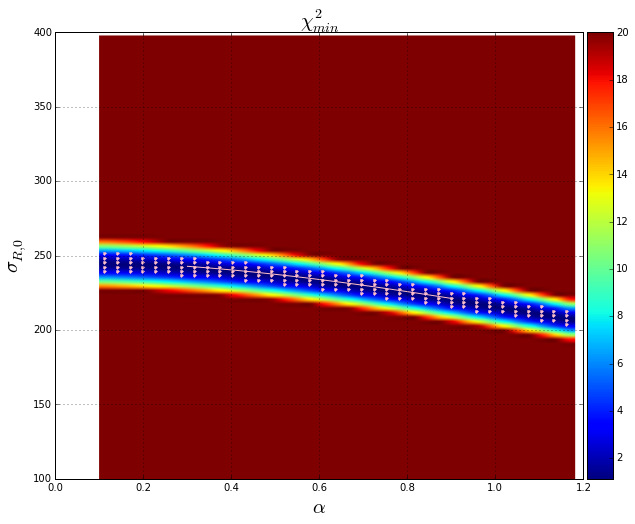

In [69]:
plt.figure(figsize=(10,8))
ax = plt.gca()
min_sigmas = np.where(image_min < image_min.min() + 3.)
slice_alph, slice_sig = min_sigmas[1], min_sigmas[0]
# видимо округление не правильное, добавляем шаг
slice_alph = map(lambda l: 0.01 + alphas[0] + (alphas[-1] - alphas[0])*l/len(image_min[0]) , slice_alph)
slice_sig = map(lambda l: 3.0 + sigmas[0] + (sigmas[-1] - sigmas[0])*l/len(image_min), slice_sig)
ax.plot(slice_alph, slice_sig, '.', color='pink')
poly_slice = poly1d(polyfit(slice_alph, slice_sig, deg=3))
im = ax.imshow(image_min, cmap='jet', vmin=image_min.min(), vmax=20., interpolation='spline16', 
           origin="lower", extent=[alphas[0], alphas[-1],sigmas[0],sigmas[-1]], aspect="auto")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
ax.set_title('$\chi^2_{min}$', size=20.)
ax.set_ylabel('$\sigma_{R,0}$', size=20.)
ax.set_xlabel(r'$\alpha$', size=20.)
ax.grid()
xx = np.arange(0.3, 0.9, 0.01)
ax.plot(xx, poly_slice(xx), color='pink')
plt.show()

In [70]:
alphs = np.arange(0.2, 0.9, 0.01)
err_maj, err_maj_p = [], []
err_min, err_min_p = [], []
err_mean, err_mean_p = [], []
main_slice = lambda l: sig_min_0/sqrt(sin_i**2 + cos_i**2 * l**2)

for al in alphs:
    global alpha, sig_R_0
    alpha = al
    sig_R_0 = main_slice(al)
#     err_maj.append(sum(power([sig_maj_exp(Robs, p[0]) - p[1] for 
#                                    (Robs, p) in zip(r_ma_bind, sig_maj_data)], 2))/len(sig_maj_data))
#     err_min.append(sum(power([sig_min_exp(p[0]) - p[1] for p in sig_min_data], 2))/len(sig_min_data))
    err_maj.append(calc_chi2_normal(sig_maj_p, e_sig_maj_p, [sig_maj_exp(Robs, p[0]) for 
                                   (Robs, p) in zip(r_ma_bind, sig_maj_data)]))
    err_min.append(calc_chi2_normal(sig_min_p, e_sig_min_p, [sig_min_exp(r) for r in radii_min]))
    err_mean.append(0.5*(err_maj[-1] + err_min[-1]))
    sig_R_0 = poly_slice(alpha)
#     err_maj_p.append(sum(power([sig_maj_exp(Robs, p[0]) - p[1] for 
#                                    (Robs, p) in zip(r_ma_bind, sig_maj_data)], 2))/len(sig_maj_data))
#     err_min_p.append(sum(power([sig_min_exp(p[0]) - p[1] for p in sig_min_data], 2))/len(sig_min_data))
    err_maj_p.append(calc_chi2_normal(sig_maj_p, e_sig_maj_p, [sig_maj_exp(Robs, p[0]) for 
                                   (Robs, p) in zip(r_ma_bind, sig_maj_data)]))
    err_min_p.append(calc_chi2_normal(sig_min_p, e_sig_min_p, [sig_min_exp(r) for r in radii_min]))
    err_mean_p.append(0.5*(err_maj_p[-1] + err_min_p[-1]))

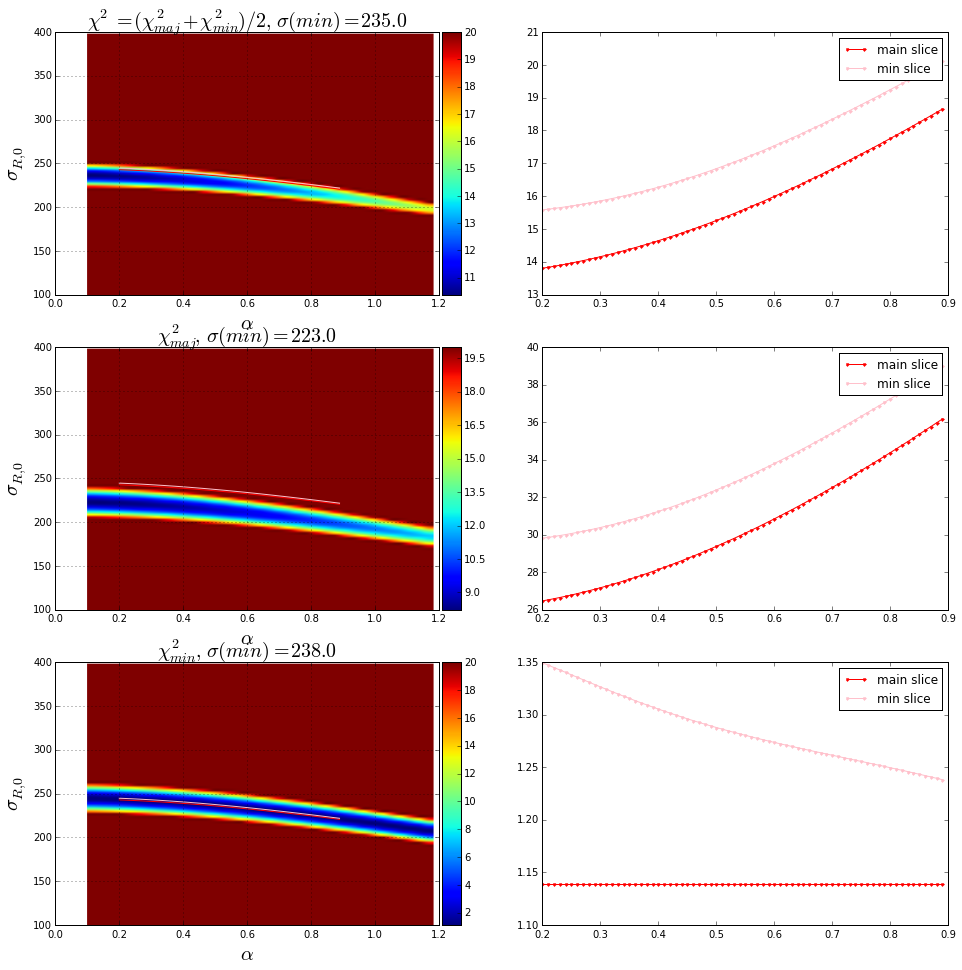

In [71]:
xx = np.arange(0.2, 0.9, 0.01)
    
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=False, sharey=False, figsize=[16,16])

plot_chi2_map(image, axes[0, 0], log_scale=False, title='$\chi^2 = (\chi^2_{maj} + \chi^2_{min})/2$', is_contour=False, vmax=20.)
axes[0,0].plot(xx, map(main_slice, xx), color='red')
axes[0,0].plot(xx, poly_slice(xx), color='pink')

axes[0, 1].plot(alphs, err_mean, '.-', label = 'main slice', color='red')
axes[0, 1].plot(alphs, err_mean_p, '.-', label = 'min slice', color='pink'); axes[0, 1].legend()

plot_chi2_map(image_maj, axes[1, 0], log_scale=False, title='$\chi^2_{maj}$', is_contour=False, vmax=20.)
axes[1,0].plot(xx, map(main_slice, xx), color='red')
axes[1,0].plot(xx, poly_slice(xx), color='pink')

axes[1, 1].plot(alphs, err_maj, '.-', label = 'main slice', color= 'red')
axes[1, 1].plot(alphs, err_maj_p, '.-', label = 'min slice', color= 'pink'); axes[1, 1].legend()

plot_chi2_map(image_min, axes[2, 0], log_scale=False, title='$\chi^2_{min}$', is_contour=False, vmax=20.)
axes[2,0].plot(xx, map(main_slice, xx), color='red')
axes[2,0].plot(xx, poly_slice(xx), color='pink')

axes[2, 1].plot(alphs, err_min, '.-', label = 'main slice', color= 'red')
axes[2, 1].plot(alphs, err_min_p, '.-', label = 'min slice', color='pink'); axes[2, 1].legend()

plt.show()

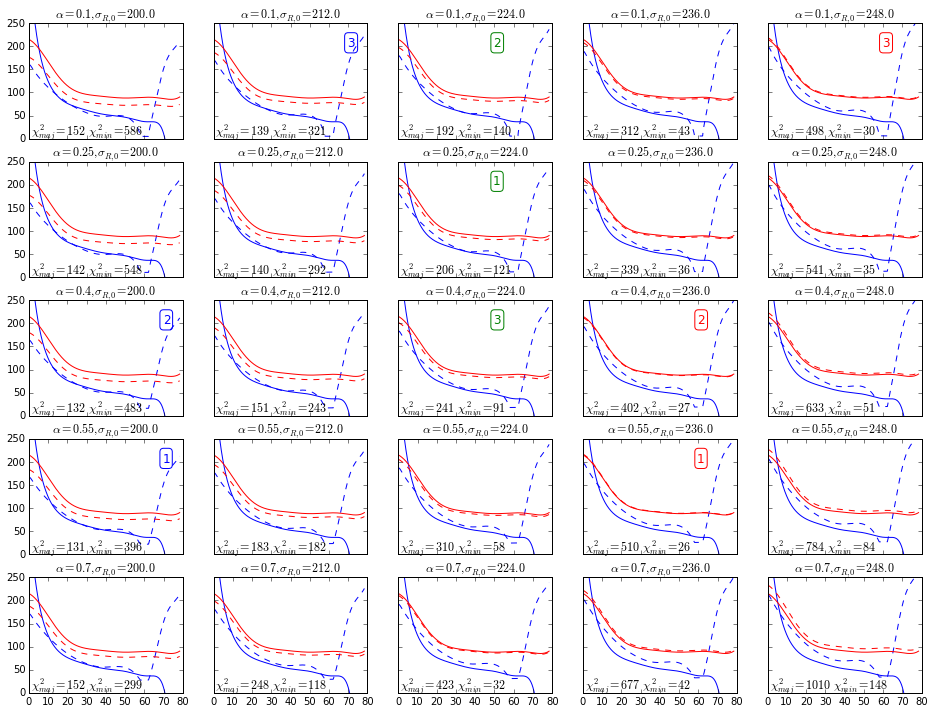

In [72]:
# Перебор alpha
alphas = np.arange(0.1, 0.85, 0.15)

# Перебор sig_R_0
sigmas = np.arange(200., 260., 12.)

# Те картинки, на которые стоит обратить особое внимание
good_pics = []

def plot_ranges(sigmas_range, alphas_range, good_pics=[], calc_chi=False, best_err=3):
    '''
    Для всех предложенных вариантов sigR и alpha
    рисует графики исходных и восстановленных дисперсий скоростей los.
    Если calc_chi = True, то также считает ошибку по наблюдаемым точкам.
    Если ошибка считается, то отмечаются best_err лучших (наименьших) результата.
    Синий - для большой оси, красный - малой, зеленый - полусумма.
    Изменяет глобальные значения sig_R_0 и alpha!'''
    nrows = alphas.size
    ncols = sigmas.size
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=[16,12])
    plt_index = 0
    # Последнее - среднее геометрическое
    sqerr_majs, sqerr_mins, sqerr_mean = [],[],[]
    for al in alphas_range:
        for si in sigmas_range:
            global alpha, sig_R_0
            alpha = al
            sig_R_0 = si
            ax = axes[plt_index/ncols, plt_index % ncols]
            ax.set_title(r'$\alpha = %s, \sigma_{R,0}=%s$' % (al,si))
            ax.plot(points, poly_sig_maj(points), '-', color='blue')
            ax.plot(points_obs, [sig_maj_exp(Rr, Robs) for (Rr, Robs) in zip(points_real, points_obs)], 
                 '--', color='blue')
            ax.plot(points, poly_sig_min(points), '-', color='red')
            ax.plot(points, [sig_min_exp(R) for R in points], '--', color='red')
            if calc_chi:
                sqerr_maj = sum(power([sig_maj_exp(Robs, p[0]) - p[1] for 
                                   (Robs, p) in zip(r_ma_bind, sig_maj_data)], 2))/len(sig_maj_data)
                sqerr_min = sum(power([sig_min_exp(p[0]) - p[1] for p in sig_min_data], 2))/len(sig_min_data)
                ax.text(1, 5, "$\chi^2_{maj}=%5.0f\, \chi^2_{min}=%5.0f$" % (sqerr_maj, sqerr_min), fontsize=12)
                sqerr_majs.append(sqerr_maj);sqerr_mins.append(sqerr_min)
                sqerr_mean.append(0.5*sqerr_maj+0.5*sqerr_min)
            ax.set_ylim(0, 250)
            ax.set_xlim(0, 80)
            if (plt_index/ncols, plt_index % ncols) in good_pics:
                ax.plot([40], [200], 'o', markersize=12., color=(0.2,1.0,0.))
            plt_index = plt_index + 1
    if calc_chi:
        best_maj_err = heapq.nsmallest(best_err, sqerr_majs)
        for b_maj in best_maj_err:
            b_maj_ind = sqerr_majs.index(b_maj)
            ax = axes[b_maj_ind/ncols, b_maj_ind % ncols]
            #ax.plot([35], [200], 'o', markersize=12., color='b')
            ax.text(70, 200, "%s" % (best_maj_err.index(b_maj)+1), fontsize=12, color='b', 
                    bbox=dict(facecolor='none', edgecolor='b', boxstyle='round'))
        best_min_err = heapq.nsmallest(best_err, sqerr_mins)
        for b_min in best_min_err:
            b_min_ind = sqerr_mins.index(b_min)
            ax = axes[b_min_ind/ncols, b_min_ind % ncols]
            #ax.plot([30], [200], 'o', markersize=12., color='r')
            ax.text(60, 200, "%s" % (best_min_err.index(b_min)+1), fontsize=12, color='r', 
                    bbox=dict(facecolor='none', edgecolor='r', boxstyle='round'))
        best_mean_err = heapq.nsmallest(best_err, sqerr_mean)
        for b_mean in best_mean_err:
            b_mean_ind = sqerr_mean.index(b_mean)
            ax = axes[b_mean_ind/ncols, b_mean_ind % ncols]
            #ax.plot([25], [200], 's', markersize=12., color='g')
            ax.text(50, 200, "%s" % (best_mean_err.index(b_mean)+1), fontsize=12, color='g', 
                    bbox=dict(facecolor='none', edgecolor='g', boxstyle='round'))

plot_ranges(sigmas, alphas, good_pics=good_pics, calc_chi=True)
plt.show()

Shapiro и Gerssen в статье 2003 года (http://arxiv.org/abs/astro-ph/0308489) "Observational Constraints on Disk Heating as a Function of Hubble Type" пытались проследить зависимость отношения $\sigma_Z/\sigma_R$ для галактик разных хаббловских типов. Неплохо было бы ради интереса на их график добавить и нашу полученную точку. У 3245 тип S0, т.е. располагается она левее крайней отметки.

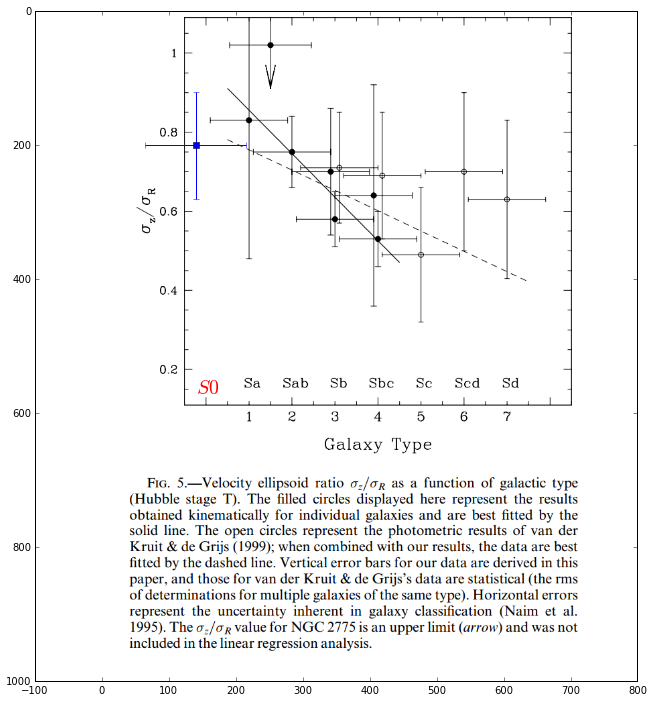

In [73]:
os.chdir("C:\\science\\2FInstability\\notebooks")

plt.imshow(np.asarray(pil.Image.open("shapiro_2003_hubble_type.png")))
# Не настоящее значение еще!
plt.plot(140, 200, 's', color='blue')
plt.errorbar(140, 200, yerr=80, xerr=75, color='blue')
plt.text(140, 570, "$S0$", fontsize=20, color='red')
plt.ylim(1000, 0)
plt.show()

Еще одно интересное приложение для тех галактик, в которых есть данные по газу. Разница между скоростями вращения звезд и газа вокруг центра галактики называется ассиметричным сдвигом и описывается следующим уравнением (Binney & Tremaine 1987): $$v_{\mathrm{c}}^{2}-\bar{v}_{\varphi}^{2}=\sigma_{R}^{2}\left(\frac{\sigma_{\varphi}^{2}}{\sigma_{R}^{2}}-1-\frac{\partial\ln\Sigma_{\mathrm{s}}}{\partial\ln R}-\frac{\partial\ln\sigma_{R}^{2}}{\partial\ln R}\right)\,$$
Отношение ${\displaystyle \frac{\sigma_{\varphi}^{2}}{\sigma_{R}^{2}}}$ знаем из соответствующего уравнения. Поймем, как в этом выражении вычисляется логарифмическая производная ${\displaystyle \frac{\partial\ln\Sigma_{\mathrm{s}}}{\partial\ln R}}$. Если отношение массы к светимости принять постоянной вдоль радиуса величиной, то в производной ${\displaystyle \frac{\partial\ln\Sigma_{\mathrm{s}}}{\partial\ln R}}$ можно использовать поверхностную яркость звездного диска вместо поверхностной плотности $\Sigma_{\mathrm{s}}$ в тех полосах, которые трассируют старое звездное население. Это означает, что логарифмическая производная должна быть заменена отношением $-{\displaystyle \frac{R}{h_{\text{d}}}}\,,$ где $h_{\text{d}}$ --- экспоненциальный масштаб диска.

Таким образом, если мы восстановили профиль значений $\sigma_R$ и имеем представление о фотометрии диска галактики, то мы можем вычислить предполагаемый профиль газовой кривой вращения и сравнить его с истинным. В том случае, когда у нас нет данных по газу, мы можем их предсказать. Продемонстрируем это.

Фотометрия отсюда http://arxiv.org/abs/1002.4370 дает значение экспоненциального масштаба $h_r=2.29\, kpc$. Необходимую нам логарифмическую производную несложно посчитать, если приблизить профиль полиномом $\sigma_R(R) \equiv p(x)$: $$\frac{\partial\ln\sigma_{R}^{2}}{\partial\ln R} = \frac{2}{p(R)}\times\frac{\partial\ln p(e^{\ln R})}{\partial\ln R} = \frac{2Rp^{\prime}(R)}{p(R)}$$ Попробуем предсказать значения газовой кривой вращения для полученного выше маржинального профиля:

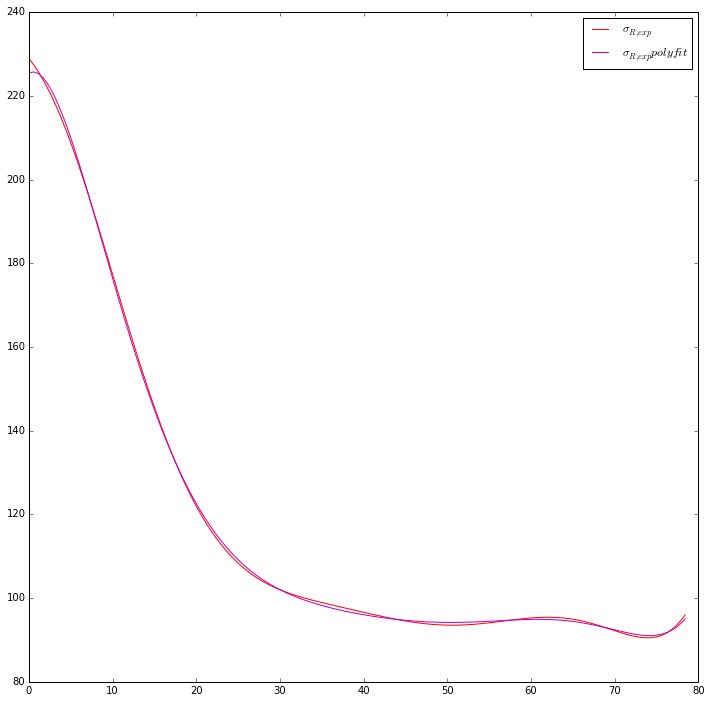

In [74]:
#Дублируем на всякий случай значения параметров
sig_R_0 = 229.
alpha = 0.3

#Приближаем полиномом
poly_marj_R = poly1d(polyfit(points, [sigR_exp(R) for R in points], deg=7))

plt.plot(points, [sigR_exp(R) for R in points], '-', color='red', label='$\sigma_{R, exp}$')
plt.plot(points, [poly_marj_R(R) for R in points], '-', color='m', label='$\sigma_{R, exp} polyfit$')
plt.legend()
plt.show()

In [75]:
def log_deriv(R):
    """Вычисление логарифмической производной sig_R,
    для ассиметричного сдвига - как описано выше"""
    return 2*R * poly_marj_R.deriv()(R) / poly_marj_R(R)

#Масштаб диска в секундах
h_d = 2.29 * 1000 / scale
print "h_d = %s" % h_d

def asym_drift_value(R):
    """Вычисляем величину сдвига между квадратами скоростей газа и звезд"""
    return poly_marj_R(R)**2 * (sigPhi_to_sigR(R)**2 - 1 + R/h_d - log_deriv(R))

predict_drift = lambda l: asym_drift_value(l) + poly_star(l)**2 
predict_gas = lambda l: sqrt(predict_drift(l)) if predict_drift(l) > 0 else np.nan

h_d = 19.5726495726


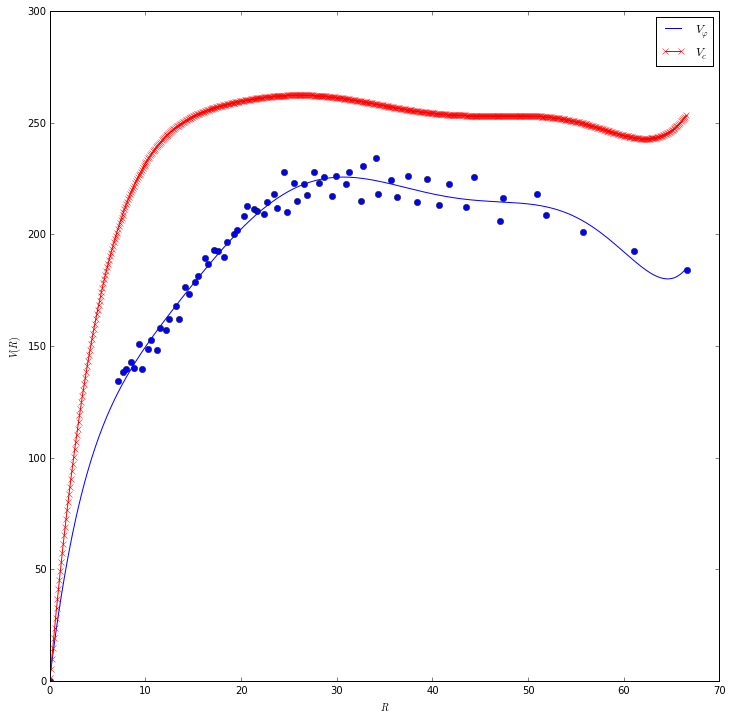

In [76]:
plt.plot(r_ma_b, vel_ma_b, 'o', color='blue', markersize=6)
plt.plot(test_points, poly_star(test_points), '-', color='blue', label=r'$V_{\varphi}$')
plt.plot(test_points, [sqrt(asym_drift_value(R) + poly_star(R)**2) for R in test_points], 
         'x-', color='red', label=r'$V_c$')
plt.xlabel('$R$'); plt.ylim(0)
plt.ylabel('$V(R)$')
plt.legend()
plt.show()

Просто нанесем данные по газу (без исправления):

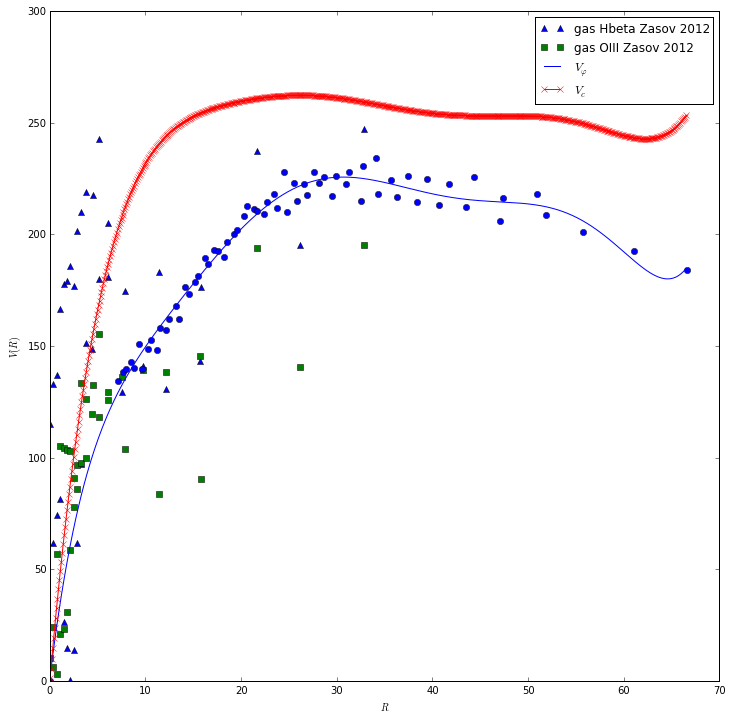

In [77]:
r_g_H_b1, vel_g_H_b1, e_vel_g_H_b1 = correct_rotation_curve(r_g_H, vel_g_H, e_vel_g_H,  0., 1300.5, incl)
r_g_O_b1, vel_g_O_b1, e_vel_g_O_b1 = correct_rotation_curve(r_g_O, vel_g_O, e_vel_g_O,  0., 1300.5, incl)

plt.plot(r_g_H_b1, vel_g_H_b1, '^', label="gas Hbeta Zasov 2012")
plt.plot(r_g_O_b1, vel_g_O_b1, 's', label="gas OIII Zasov 2012")
plt.plot(r_ma_b, vel_ma_b, 'o', color='blue', markersize=6)
plt.plot(test_points, poly_star(test_points), '-', color='blue', label=r'$V_{\varphi}$')
plt.plot(test_points, [sqrt(asym_drift_value(R) + poly_star(R)**2) for R in test_points], 
         'x-', color='red', label=r'$V_c$')
plt.xlabel('$R$'); plt.ylim(0)
plt.ylabel('$V(R)$')
plt.legend()
plt.show()

Выглядит конечно неплохо, но кажется немного завышенным. Попробуем нарисовать несколько кривых:

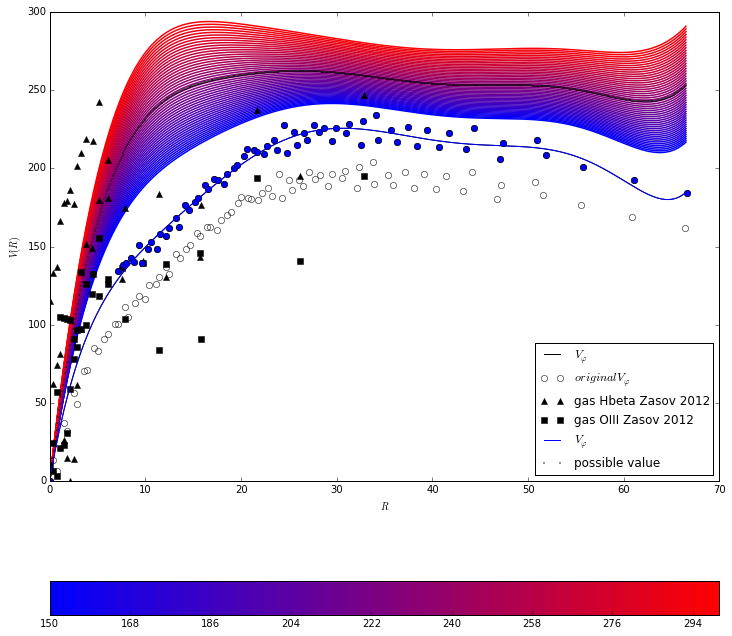

In [78]:
import matplotlib
min_s, max_s = (150., 300.)
step_s = 3.
sigmas = np.arange(min_s, max_s, step_s)
mymap = matplotlib.colors.LinearSegmentedColormap.from_list('mycolors',['blue','red'])
Z = [[0,0],[0,0]]
levels = np.arange(min_s, max_s + step_s, step_s)
CS3 = plt.contourf(Z, levels, cmap=mymap)
plt.clf()

plt.plot(r_ma_b, vel_ma_b, 'o', color='black', markersize=6)
plt.plot(test_points, poly_star(test_points), '-', color='black', label=r'$V_{\varphi}$')
plt.xlabel('$R$')
plt.ylabel('$V(R)$')
plt.ylim(0, 300)

for s in sigmas:
    sig_R_0 = s
    poly_marj_R = poly1d(polyfit(points, [sigR_exp(R) for R in points], deg=7))
    ind = np.where(sigmas==s)[0][0]
    plt.plot(test_points, [predict_gas(R) for R in test_points], 
     '-', lw=1.5, ms=0.5, color=mymap(ind*1.0/len(sigmas)))

plt.colorbar(CS3, orientation='horizontal')
    
r_ma_b2, vel_ma_b2, e_vel_b2 = correct_rotation_curve(r_ma, vel_ma, e_vel_ma,  0.0, 1300.5, 90.)
plt.plot(r_ma_b2, vel_ma_b2, 'o', color='m', mfc='none', markersize=6, label = r'$original V_{\varphi}$')
plt.plot(r_g_H_b1, vel_g_H_b1, '^', label="gas Hbeta Zasov 2012", color = 'black')
plt.plot(r_g_O_b1, vel_g_O_b1, 's', label="gas OIII Zasov 2012", color = 'black')
plt.plot(r_ma_b, vel_ma_b, 'o', color='blue', markersize=6)
plt.plot(test_points, poly_star(test_points), '-', color='blue', label=r'$V_{\varphi}$')
    
sig_R_0 = 229.
poly_marj_R = poly1d(polyfit(points, [sigR_exp(R) for R in points], deg=7))
plt.plot(test_points, [predict_gas(R) for R in test_points], 
     'o', label='possible value', color='black', mfc='none', markersize=1)

plt.legend(loc='lower right')
plt.show()


Есть еще статья с данными вот такая: http://adsabs.harvard.edu/abs/2001ApJ...555..685B, но там не по главным осям разрезы сделаны.

Как мы помним из карт выше - тут есть вырождение. Попробуем применить герсеновскую методику, чтобы понять, есть ли вырождение у них. Для этого возьмем прямой участок и подгоним экспонентами: 
$$\sigma_R = \sigma_{R,0}e^{-R/h}$$ $$\sigma_Z = \sigma_{Z,0}e^{-R/h}$$
Подставим в уравнение для малой оси и возьмем логарифм: 
$$\log{\sigma_{los, min}} = \log{\sigma_{R, 0}} - R/h + 0.5\log{(\sin^2i + \sigma_{z,0}^2/\sigma_{R,0}^2 \cos^2i)}$$
И теперь если подогнать прямой $Y = AX + B$ то $A=-1/h$, $B = \log{\sigma_{R, 0}} + 0.5\log{(\sin^2i + \sigma_{z,0}^2/\sigma_{R,0}^2 \cos^2i)}$, то видно, где есть место для вырождения, можем нарисовать карту. Точки обрежем по 21".

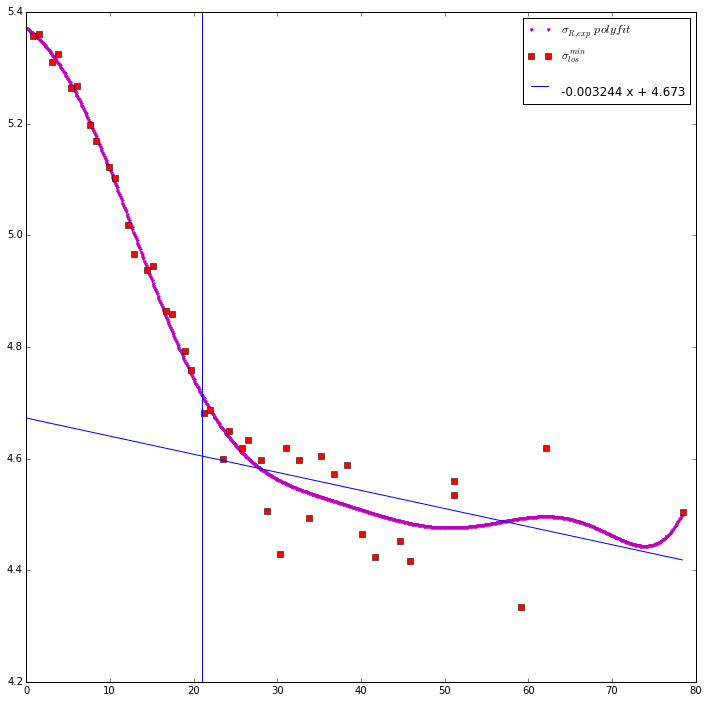

In [79]:
plt.plot(points, [log(poly_sig_min(R)) for R in points], '.', color='m', label='$\sigma_{R, exp}\, polyfit$')
plt.plot(radii_min, map(np.log, sig_min_p), 's', label='$\sigma_{los}^{min}$', color='red')
poly_exp_line = poly1d(polyfit(radii_min[18:], map(np.log, sig_min_p[18:]), deg=1))
plt.plot(points, poly_exp_line(points), '-', label='%s' % poly_exp_line)
plt.axvline(x=21.)
plt.legend()
plt.show()

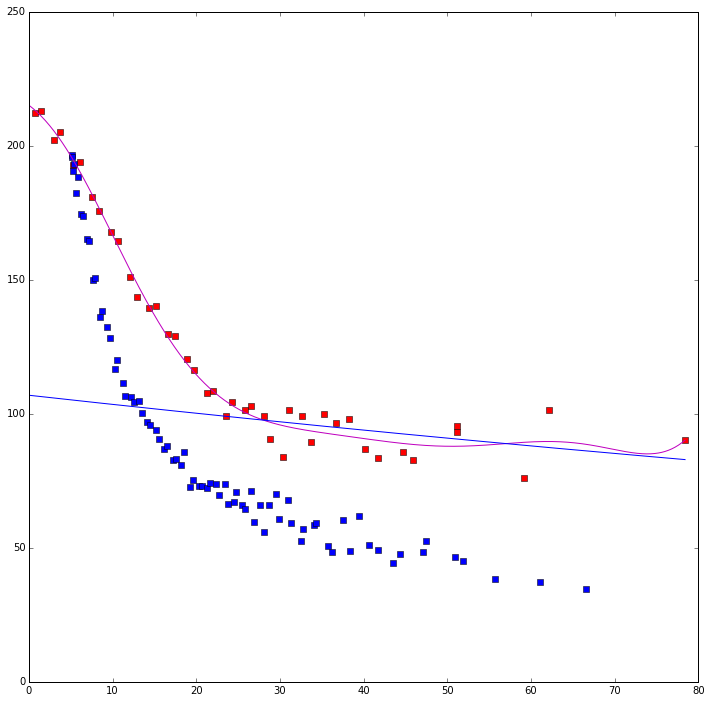

In [80]:
plt.plot(radii_min, sig_min_p, 's', label='$\sigma_{los}^{min}$', color='red')
plt.plot(radii_maj, sig_maj_p, 's', label='$\sigma_{los}^{maj}$', color='blue')
plt.plot(points, [poly_sig_min(R) for R in points], '-', color='m', label='$\sigma_{R, exp} polyfit$')
plt.plot(points, map(np.exp, poly_exp_line(points)), '-')
plt.show()

In [81]:
os.chdir("C:\\science\\2FInstability\\data\\ngc3245")
h_kin = -poly_exp_line[1]

alphas = np.arange(0.2, 0.9, 0.03)
sigmas = np.arange(10.0, 200, 3.)

sig_maj_gers_exp = lambda l: sig_R_0*exp(-l*h_kin)*sqrt(sigPhi_to_sigR(l)**2 * sin_i**2 + alpha **2 * cos_i**2)
sig_min_gers_exp = lambda l: sig_R_0*exp(-l*h_kin)*sqrt(sin_i**2 + alpha **2 * cos_i**2)

def compute_chi2_maps(alphas=(), sigmas=()):
    '''Вычисляем все изображения, чтобы потом только настройки менять'''
    image_min = np.random.uniform(size=(len(sigmas), len(alphas)))
    image_maj = np.random.uniform(size=(len(sigmas), len(alphas)))
    image = np.random.uniform(size=(len(sigmas), len(alphas)))
    global alpha, sig_R_0
    cut_data = lambda l: l[0] > 21.
    ma_data = filter(cut_data, zip(radii_maj, sig_maj_p))
    mi_data = filter(cut_data, zip(radii_min, sig_min_p))
    for i,si in enumerate(sigmas):
        for j,al in enumerate(alphas):
            alpha = al
            sig_R_0 = si
            sqerr_maj = sum(power([sig_maj_gers_exp(p[0]) - p[1] for p in ma_data], 2))/len(ma_data)
            sqerr_min = sum(power([sig_min_gers_exp(p[0]) - p[1] for p in mi_data], 2))/len(mi_data)
            image_maj[i][j] = sqerr_maj
            image_min[i][j] = sqerr_min
            image[i][j] = 0.5*(sqerr_maj+sqerr_min)
    return image, image_maj, image_min

pics_path = '.\\pics\\'
if not os.path.exists(pics_path):
    os.makedirs(pics_path)
if os.path.isfile(pics_path + 'gers_chi2_map_maj.npy'):
    image_maj = np.load(pics_path + "gers_chi2_map_maj.npy")
    image_min = np.load(pics_path + "gers_chi2_map_min.npy")
    image = np.load(pics_path + "gers_chi2_map.npy")
else:
    image, image_maj, image_min = compute_chi2_maps(alphas=alphas, sigmas=sigmas)
    np.save(pics_path + 'gers_chi2_map_maj', image_maj)
    np.save(pics_path + 'gers_chi2_map_min', image_min)
    np.save(pics_path + 'gers_chi2_map', image)

Связь, по которой по идее должно идти вырождение, описывается как $\sigma_{R,0}=\frac{e^B}{\sqrt{\sin^2i + \alpha^2\cos^2i}}$

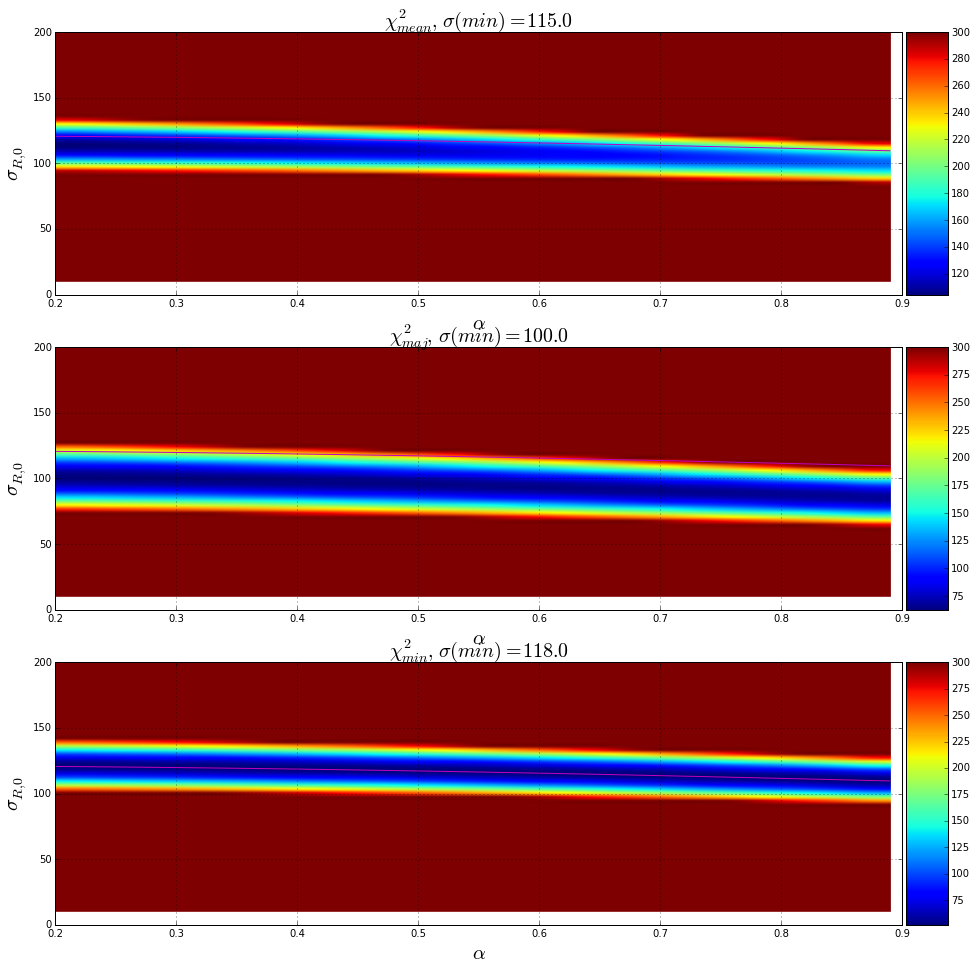

In [82]:
def plot_chi2_map(image, ax, log_scale=False, title='$\chi^2$', is_contour=False, vmax=0.):
    if image is not None:
        image_log = image
        im = ax.imshow(image_log, cmap='jet', vmin=image_log.min(), vmax=vmax, interpolation='spline16', 
                   origin="lower", extent=[alphas[0], alphas[-1],sigmas[0],sigmas[-1]], aspect="auto")
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)
        min_sigma = sigmas[int(np.where(image == image.min())[0])]        
        ax.set_title(title + '$,\ \sigma(min)=%s$' % min_sigma, size=20.)
        ax.set_ylabel('$\sigma_{R,0}$', size=20.)
        ax.set_xlabel(r'$\alpha$', size=20.)
        ax.grid(True)
 

degenereation_slice = lambda l: exp(poly_exp_line[0])/ sqrt(sin_i**2 + l**2 * cos_i**2)
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=False, sharey=True, figsize=[16,16])
plot_chi2_map(image, axes[0], log_scale=False, title='$\chi^2_{mean}$', is_contour=False, vmax=300.)
plot_chi2_map(image_maj, axes[1], log_scale=False, title='$\chi^2_{maj}$', is_contour=False, vmax=300.)
plot_chi2_map(image_min, axes[2], log_scale=False, title='$\chi^2_{min}$', is_contour=False, vmax=300.)
axes[0].plot(xx, map(degenereation_slice, xx), '-', color='m')
axes[1].plot(xx, map(degenereation_slice, xx), '-', color='m')
axes[2].plot(xx, map(degenereation_slice, xx), '-', color='m')
plt.show()

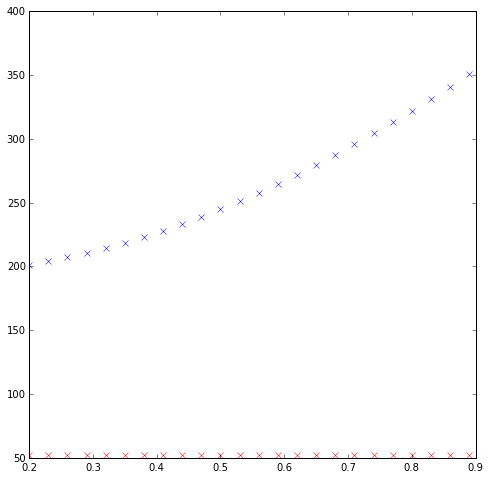

In [83]:
plt.figure(figsize=(8, 8))
for al in alphas:
    global alpha, sig_R_0
    cut_data = lambda l: l[0] > 21.
    ma_data = filter(cut_data, zip(radii_maj, sig_maj_p))
    mi_data = filter(cut_data, zip(radii_min, sig_min_p))
    alpha = al
    sig_R_0 = degenereation_slice(alpha)
    sqerr_maj = sum(power([sig_maj_gers_exp(p[0]) - p[1] for p in ma_data], 2))/len(ma_data)
    sqerr_min = sum(power([sig_min_gers_exp(p[0]) - p[1] for p in mi_data], 2))/len(mi_data)
    plt.plot(alpha, sqerr_maj, 'x', color='blue')
    plt.plot(alpha, sqerr_min, 'x', color='red')
plt.show()

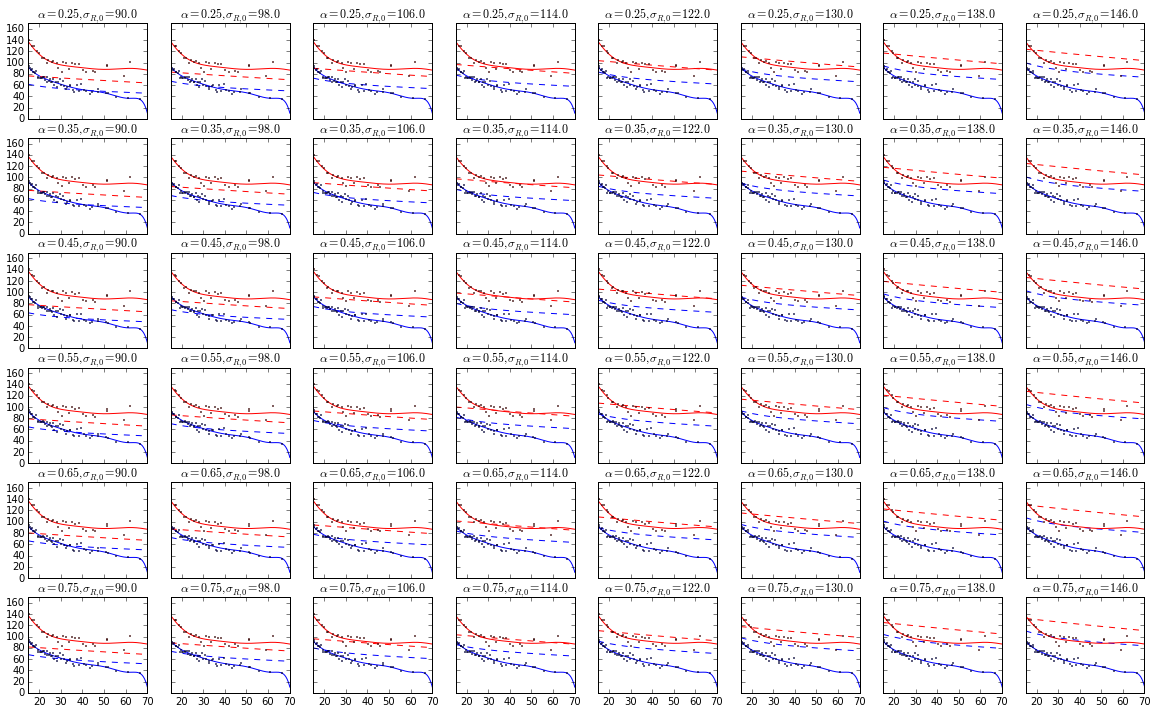

In [84]:
alphas = np.arange(0.25, 0.85, 0.1)
sigmas = np.arange(90., 150., 8.)
good_pics = []

def plot_ranges_gers(sigmas_range, alphas_range, good_pics=[], calc_chi=False, best_err=3):
    nrows = alphas.size
    ncols = sigmas.size
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=[20,12])
    plt_index = 0
    # Последнее - среднее геометрическое
    sqerr_majs, sqerr_mins, sqerr_mean = [],[],[]
    for al in alphas_range:
        for si in sigmas_range:
            global alpha, sig_R_0
            alpha = al
            sig_R_0 = si
            ax = axes[plt_index/ncols, plt_index % ncols]
            ax.set_title(r'$\alpha = %s, \sigma_{R,0}=%s$' % (al,si))
            ax.plot(points, poly_sig_maj(points), '-', color='blue')
            ax.plot(points, [sig_maj_gers_exp(R) for R in points], '--', color='blue')
            ax.plot(points, poly_sig_min(points), '-', color='red')
            ax.plot(points, [sig_min_gers_exp(R) for R in points], '--', color='red')
            ax.plot(radii_min, sig_min_p, 's', color='red', ms=1)
            ax.plot(radii_maj, sig_maj_p, 's', color='blue', ms=1)
            ax.set_ylim(0, 170)
            ax.set_xlim(15, 70)
            plt_index = plt_index + 1
    

plot_ranges_gers(sigmas, alphas, good_pics=good_pics, calc_chi=True)
plt.show()

Проверим в целях найти минимум еще две идеи - построим карту по честному отношению и по степенной кривой вращения:

In [85]:
os.chdir("C:\\science\\2FInstability\\data\\ngc3245")
alphas = np.arange(0.2, 0.9, 0.03)
sigmas = np.arange(50.0, 200, 3.)

def sig_maj_gers_exp(l):
        return sig_R_0*exp(-l*h_kin)*sqrt(sigPhi_to_sigR_real(l) * sin_i**2 + alpha **2 * cos_i**2)

def compute_chi2_maps(alphas=(), sigmas=()):
    '''Вычисляем все изображения, чтобы потом только настройки менять'''
    image_min = np.random.uniform(size=(len(sigmas), len(alphas)))
    image_maj = np.random.uniform(size=(len(sigmas), len(alphas)))
    image = np.random.uniform(size=(len(sigmas), len(alphas)))
    global alpha, sig_R_0
    cut_data = lambda l: l[0] > 21.
    ma_data = filter(cut_data, zip(radii_maj, sig_maj_p))
    mi_data = filter(cut_data, zip(radii_min, sig_min_p))    
    cut_data = lambda l: l[0] < 54.
    ma_data = filter(cut_data, ma_data)
    mi_data = filter(cut_data, mi_data)
    for i,si in enumerate(sigmas):
        for j,al in enumerate(alphas):
            alpha = al
            sig_R_0 = si
            sqerr_maj = sum(power([sig_maj_gers_exp(p[0]) - p[1] for p in ma_data], 2))/len(ma_data)
            sqerr_min = sum(power([sig_min_gers_exp(p[0]) - p[1] for p in mi_data], 2))/len(mi_data)
            image_maj[i][j] = sqerr_maj
            image_min[i][j] = sqerr_min
            image[i][j] = 0.5*(sqerr_maj+sqerr_min)
    return image, image_maj, image_min

pics_path = '.\\pics\\'
if not os.path.exists(pics_path):
    os.makedirs(pics_path)
if os.path.isfile(pics_path + 'gers2_chi2_map_maj.npy'):
    image_maj = np.load(pics_path + "gers2_chi2_map_maj.npy")
    image_min = np.load(pics_path + "gers2_chi2_map_min.npy")
    image = np.load(pics_path + "gers2_chi2_map.npy")
else:
    image, image_maj, image_min = compute_chi2_maps(alphas=alphas, sigmas=sigmas)
    np.save(pics_path + 'gers2_chi2_map_maj', image_maj)
    np.save(pics_path + 'gers2_chi2_map_min', image_min)
    np.save(pics_path + 'gers2_chi2_map', image)

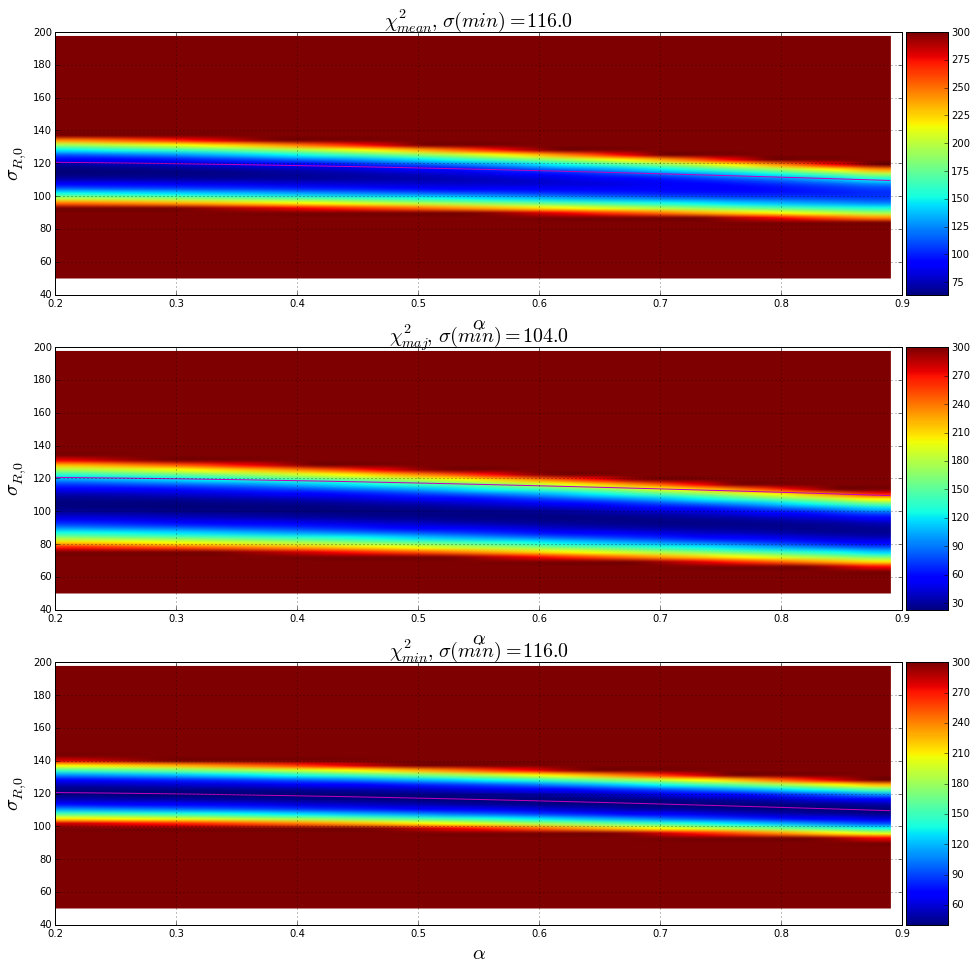

In [86]:
def plot_chi2_map(image, ax, log_scale=False, title='$\chi^2$', is_contour=False, vmax=0.):
    if image is not None:
        image_log = image
        im = ax.imshow(image_log, cmap='jet', vmin=image_log.min(), vmax=vmax, interpolation='spline16', 
                   origin="lower", extent=[alphas[0], alphas[-1],sigmas[0],sigmas[-1]], aspect="auto")
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)
        min_sigma = sigmas[int(np.where(image == image.min())[0])]        
        ax.set_title(title + '$,\ \sigma(min)=%s$' % min_sigma, size=20.)
        ax.set_ylabel('$\sigma_{R,0}$', size=20.)
        ax.set_xlabel(r'$\alpha$', size=20.)
        ax.grid(True)
 

degenereation_slice = lambda l: exp(poly_exp_line[0])/ sqrt(sin_i**2 + l**2 * cos_i**2)
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=False, sharey=True, figsize=[16,16])
plot_chi2_map(image, axes[0], log_scale=False, title='$\chi^2_{mean}$', is_contour=False, vmax=300.)
plot_chi2_map(image_maj, axes[1], log_scale=False, title='$\chi^2_{maj}$', is_contour=False, vmax=300.)
plot_chi2_map(image_min, axes[2], log_scale=False, title='$\chi^2_{min}$', is_contour=False, vmax=300.)
axes[0].plot(xx, map(degenereation_slice, xx), '-', color='m')
axes[1].plot(xx, map(degenereation_slice, xx), '-', color='m')
axes[2].plot(xx, map(degenereation_slice, xx), '-', color='m')
plt.show()

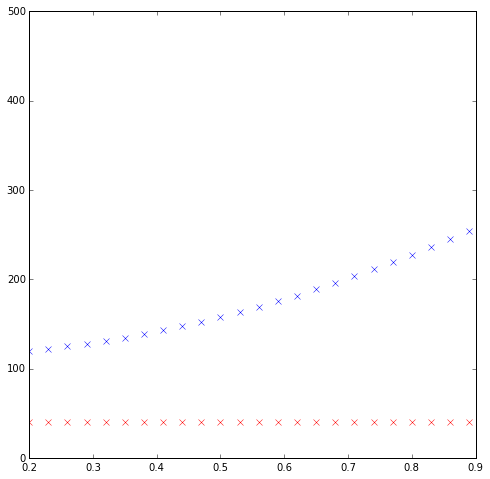

In [87]:
plt.figure(figsize=(8, 8))
for al in alphas:
    global alpha, sig_R_0
    cut_data = lambda l: l[0] > 21.
    ma_data = filter(cut_data, zip(radii_maj, sig_maj_p))
    mi_data = filter(cut_data, zip(radii_min, sig_min_p))
    cut_data = lambda l: l[0] < 54.
    ma_data = filter(cut_data, ma_data)
    mi_data = filter(cut_data, mi_data)
    alpha = al
    sig_R_0 = degenereation_slice(alpha)
    sqerr_maj = sum(power([sig_maj_gers_exp(p[0]) - p[1] for p in ma_data], 2))/len(ma_data)
    sqerr_min = sum(power([sig_min_gers_exp(p[0]) - p[1] for p in mi_data], 2))/len(mi_data)
    plt.plot(alpha, sqerr_maj, 'x', color='blue')
    plt.plot(alpha, sqerr_min, 'x', color='red')
plt.ylim(0, 500)
plt.show()

[  1.77261970e+02   5.91470538e-02] [ 12.7748401   0.02112  ]
177.261969782 0.0591470538327


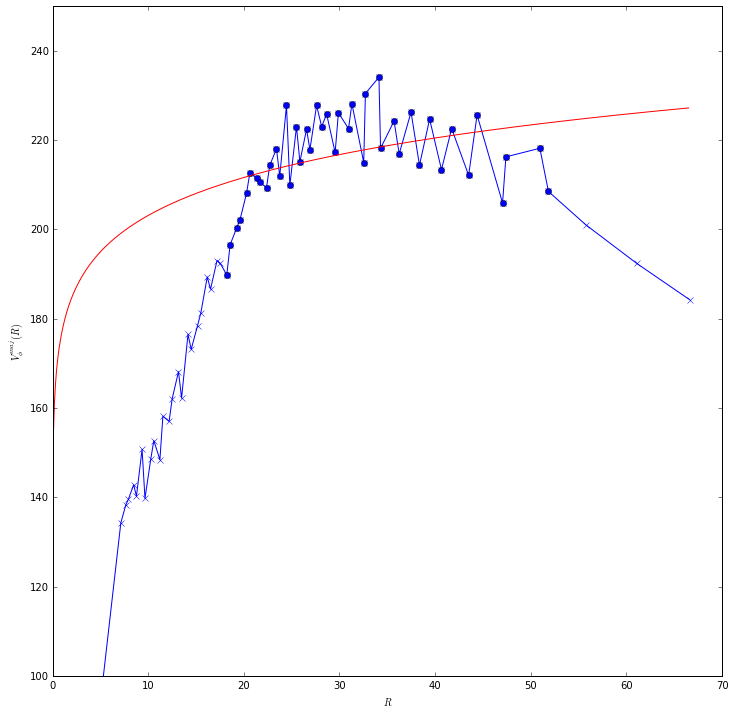

In [88]:
from scipy.optimize import curve_fit

def powerfunc(x,a,b):
     return a*np.power(x, b)

fitpars, covmat = curve_fit(powerfunc, r_ma_b[24:-3], vel_ma_b[24:-3])
variances = covmat.diagonal()
std_devs = np.sqrt(variances)
print fitpars,std_devs
print fitpars[0], fitpars[1]

plt.plot(r_ma_b, vel_ma_b, 'x-', color='blue', markersize=6)
plt.plot(r_ma_b[24:-3], vel_ma_b[24:-3], 'o', color='blue', markersize=6)
test_points = np.arange(0.0, max(r_ma_b), 0.1)
plt.plot(test_points, powerfunc(test_points, fitpars[0], fitpars[1]), 'r-')
plt.xlabel('$R$'); plt.ylim(0)
plt.ylabel('$V^{maj}_{\phi}(R)$')
plt.ylim(100, 250)
plt.show()

Теперь в ${\displaystyle \sigma_{\varphi}^{2}/\sigma_{R}^{2}=0.5\left(1+\frac{R}{\bar{v}_{\varphi}}\frac{d\bar{v}_{\varphi}}{dR}\right)}$ подставим производную для степенного закона $\bar{v}_{\varphi}(R)=V_0R^{\beta}$

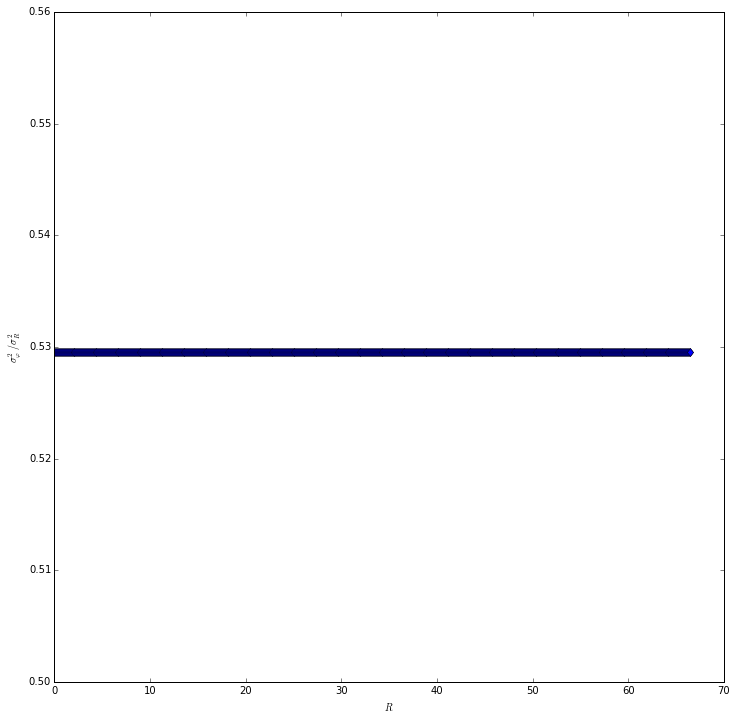

In [89]:
def sigPhi_to_sigR_power(R, a=fitpars[0], b=fitpars[1]):
        return 0.5 * (1 + b)

plt.plot(test_points, [sigPhi_to_sigR_power(R) for R in test_points], 'd-', color='blue')
plt.axhline(y=0.5)
plt.xlabel('$R$')
plt.ylabel(r"$\sigma_{\varphi}^2/\sigma_{R}^2$")
plt.show()

In [90]:
os.chdir("C:\\science\\2FInstability\\data\\ngc3245")
alphas = np.arange(0.2, 0.9, 0.03)
sigmas = np.arange(10.0, 200, 3.)

sig_maj_gers_exp = lambda l: sig_R_0*exp(-l*h_kin)*sqrt(sigPhi_to_sigR_power(l) * sin_i**2 + alpha **2 * cos_i**2)

def compute_chi2_maps(alphas=(), sigmas=()):
    '''Вычисляем все изображения, чтобы потом только настройки менять'''
    image_min = np.random.uniform(size=(len(sigmas), len(alphas)))
    image_maj = np.random.uniform(size=(len(sigmas), len(alphas)))
    image = np.random.uniform(size=(len(sigmas), len(alphas)))
    global alpha, sig_R_0
    cut_data = lambda l: l[0] > 21.
    ma_data = filter(cut_data, zip(radii_maj, sig_maj_p))
    mi_data = filter(cut_data, zip(radii_min, sig_min_p))
    for i,si in enumerate(sigmas):
        for j,al in enumerate(alphas):
            alpha = al
            sig_R_0 = si
            sqerr_maj = sum(power([sig_maj_gers_exp(p[0]) - p[1] for p in ma_data], 2))/len(ma_data)
            sqerr_min = sum(power([sig_min_gers_exp(p[0]) - p[1] for p in mi_data], 2))/len(mi_data)
            image_maj[i][j] = sqerr_maj
            image_min[i][j] = sqerr_min
            image[i][j] = 0.5*(sqerr_maj+sqerr_min)
    return image, image_maj, image_min

pics_path = '.\\pics\\'
if not os.path.exists(pics_path):
    os.makedirs(pics_path)
if os.path.isfile(pics_path + 'gers3_chi2_map_maj.npy'):
    image_maj = np.load(pics_path + "gers3_chi2_map_maj.npy")
    image_min = np.load(pics_path + "gers3_chi2_map_min.npy")
    image = np.load(pics_path + "gers3_chi2_map.npy")
else:
    image, image_maj, image_min = compute_chi2_maps(alphas=alphas, sigmas=sigmas)
    np.save(pics_path + 'gers3_chi2_map_maj', image_maj)
    np.save(pics_path + 'gers3_chi2_map_min', image_min)
    np.save(pics_path + 'gers3_chi2_map', image)

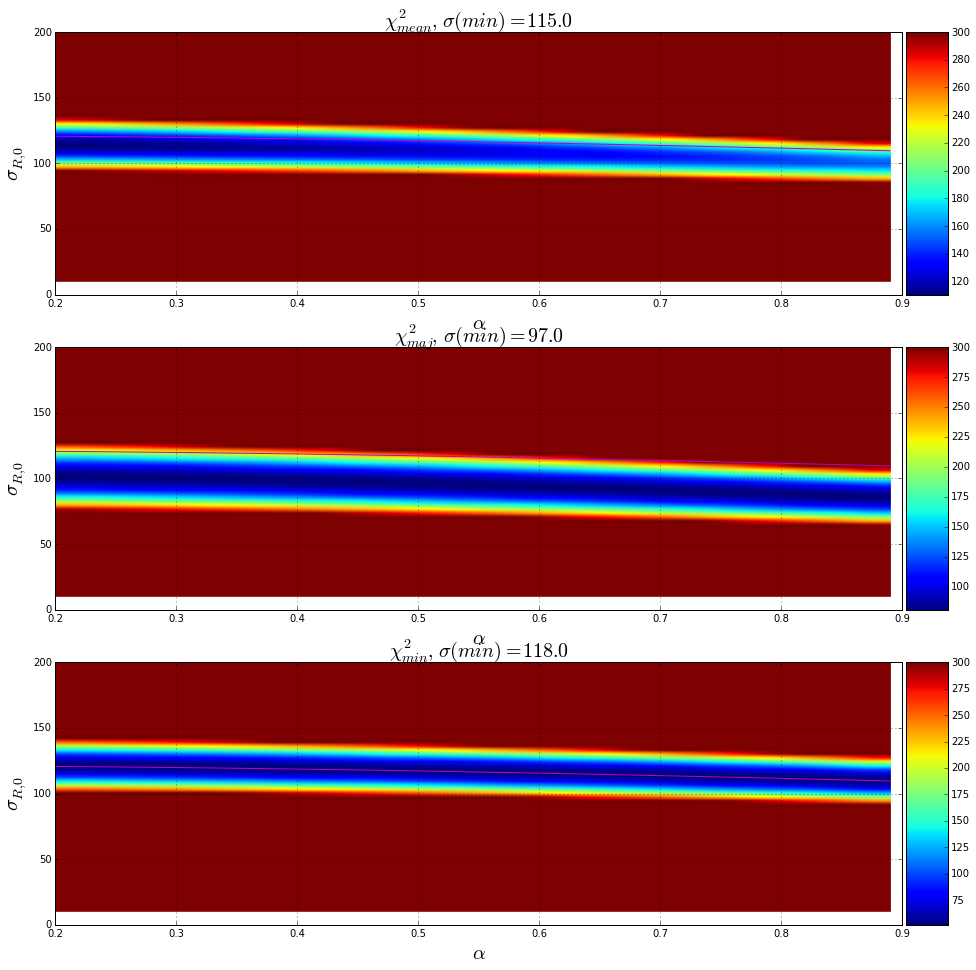

In [91]:
def plot_chi2_map(image, ax, log_scale=False, title='$\chi^2$', is_contour=False, vmax=0.):
    if image is not None:
        image_log = image
        im = ax.imshow(image_log, cmap='jet', vmin=image_log.min(), vmax=vmax, interpolation='spline16', 
                   origin="lower", extent=[alphas[0], alphas[-1],sigmas[0],sigmas[-1]], aspect="auto")
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)
        min_sigma = sigmas[int(np.where(image == image.min())[0])]        
        ax.set_title(title + '$,\ \sigma(min)=%s$' % min_sigma, size=20.)
        ax.set_ylabel('$\sigma_{R,0}$', size=20.)
        ax.set_xlabel(r'$\alpha$', size=20.)
        ax.grid(True)
 

degenereation_slice = lambda l: exp(poly_exp_line[0])/ sqrt(sin_i**2 + l**2 * cos_i**2)
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=False, sharey=True, figsize=[16,16])
plot_chi2_map(image, axes[0], log_scale=False, title='$\chi^2_{mean}$', is_contour=False, vmax=300.)
plot_chi2_map(image_maj, axes[1], log_scale=False, title='$\chi^2_{maj}$', is_contour=False, vmax=300.)
plot_chi2_map(image_min, axes[2], log_scale=False, title='$\chi^2_{min}$', is_contour=False, vmax=300.)
axes[0].plot(xx, map(degenereation_slice, xx), '-', color='m')
axes[1].plot(xx, map(degenereation_slice, xx), '-', color='m')
axes[2].plot(xx, map(degenereation_slice, xx), '-', color='m')
plt.show()

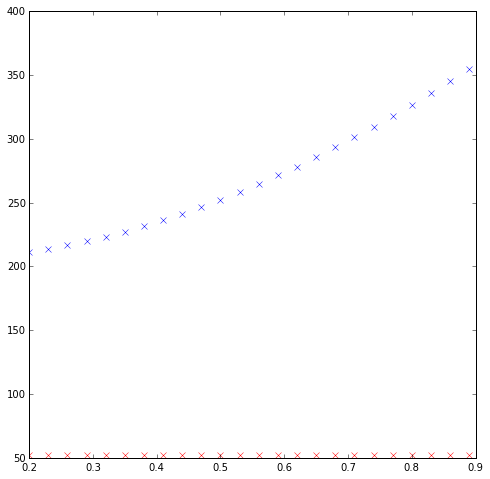

In [92]:
plt.figure(figsize=(8, 8))
for al in alphas:
    global alpha, sig_R_0
    cut_data = lambda l: l[0] > 21.
    ma_data = filter(cut_data, zip(radii_maj, sig_maj_p))
    mi_data = filter(cut_data, zip(radii_min, sig_min_p))
    alpha = al
    sig_R_0 = degenereation_slice(alpha)
    sqerr_maj = sum(power([sig_maj_gers_exp(p[0]) - p[1] for p in ma_data], 2))/len(ma_data)
    sqerr_min = sum(power([sig_min_gers_exp(p[0]) - p[1] for p in mi_data], 2))/len(mi_data)
    plt.plot(alpha, sqerr_maj, 'x', color='blue')
    plt.plot(alpha, sqerr_min, 'x', color='red')
plt.show()

# Картинки для статьи

In [93]:
image_min = np.load(pics_path + "chi2_map_min.npy")
image_maj = np.load(pics_path + "chi2_map_maj.npy")

C:\Anaconda\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
C:\Anaconda\lib\site-packages\matplotlib\text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
C:\Anaconda\lib\site-packages\matplotlib\text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


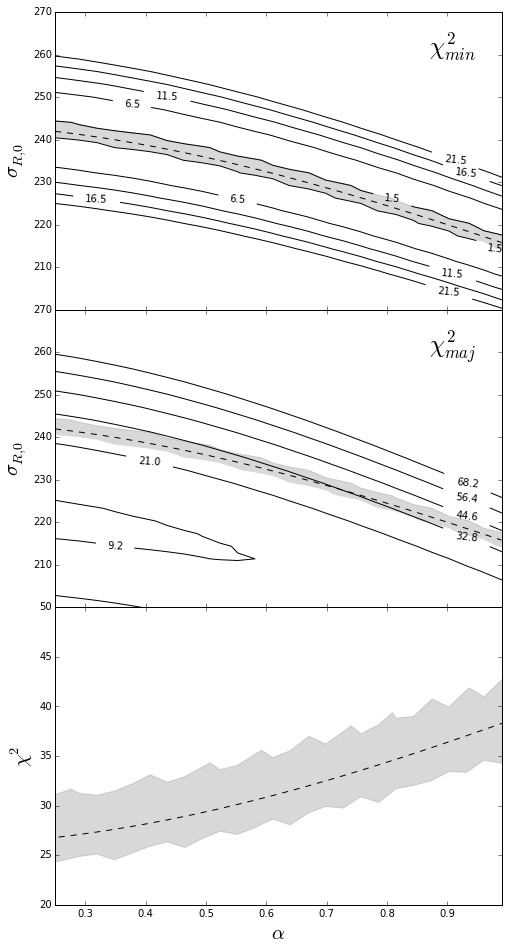

In [94]:
os.chdir("C:\\Users\\root\\Dropbox\\RotationCurves\\PhD\\paper1\\text\\imgs")

alphas = np.arange(0.1, 1.2, 0.03)
sigmas = np.arange(100.0, 400, 3.)

import matplotlib.mlab as mlab
import matplotlib

fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=False, figsize=[8,16])
ax = axes[0]
# levels = np.linspace(start=image_min.min(), stop=20., num=5)
# levels = [2., 10., 50., 100.]
# im = ax.imshow(image_min, cmap='jet', vmin=image_min.min(), vmax=20., interpolation='spline16', 
#                    origin="lower", aspect="auto")
# plt.show()
# levels = np.linspace(start=image_min.min()+1., stop=image_min.min()+20., num=5)
levels = np.linspace(start=image_min.min()*1.3, stop=image_min.min()*1.3+20, num=5)
cset=ax.contour(image_min, levels,  colors = 'k', origin='lower', extent=[alphas[0],alphas[-1],sigmas[0],sigmas[-1]])
min_map_gutter = cset.collections[0].get_paths()
v1,v2 = min_map_gutter[1].vertices, min_map_gutter[0].vertices
x1,x2 = v1[:,0], v2[:,0]
y1,y2 = v1[:,1], v2[:,1]
plt.clabel(cset, inline=1, fontsize=10, fmt='%1.1f',)
ax.text(0.87, 260, '$\chi^2_{min}$', size = 24.)
ax.set_ylabel('$\sigma_{R,0}$', size=20.)
xx = np.arange(0.25, 1.0, 0.01)
ax.plot(xx, map(main_slice, xx), '--', color='black')
ax.set_ylim(200, 270)
ax.fill_between(x1, y1, 0, color='gray', alpha=0.3)
ax.fill_between(x2, y2, 0, color='white')


min_sigmas = np.where(image_min < image_min.min() + 0.03)
slice_alph, slice_sig = min_sigmas[1], min_sigmas[0]
slice_alph = map(lambda l: alphas[0] + (alphas[-1] - alphas[0])*l/len(image_min[0]) , slice_alph)
slice_sig = map(lambda l: sigmas[0] + (sigmas[-1] - sigmas[0])*l/len(image_min), slice_sig)
# ax.plot(slice_alph, slice_sig, '.', color='pink')
poly_slice = poly1d(polyfit(slice_alph, slice_sig, deg=3))
# ax.plot(xx, poly_slice(xx), '.-', color='black')

ax = axes[1]
# levels = np.linspace(start=image_maj.min()-4.3, stop=10., num=10)
# levels = [7., 10., 50., 100.]
levels = np.linspace(start=image_maj.min()+1., stop=image_maj.min()+60., num=6)
cset=ax.contour(image_maj, levels, hold='on', colors = 'k', origin='lower', extent=[alphas[0],alphas[-1],sigmas[0],sigmas[-1]])
plt.clabel(cset, inline=1, fontsize=10, fmt='%1.1f',)
ax.text(0.87, 260, '$\chi^2_{maj}$', size = 24.)
ax.set_ylabel('$\sigma_{R,0}$', size=20.)
xx = np.arange(0.25, 1.0, 0.01)
ax.plot(xx, map(main_slice, xx), '--', color='black')

ax.fill_between(x1, y1, 0, color='gray', alpha=0.3)
ax.fill_between(x2, y2, 0, color='white')
ax.set_ylim(200, 270)

ax = axes[2]

err_maj = []
for al in alphas:
    global alpha, sig_R_0
    alpha = al
    sig_R_0 = main_slice(al)
    sqerr_maj = calc_chi2_normal(sig_maj_p, e_sig_maj_p, [sig_maj_exp(Robs, p[0]) for 
                                   (Robs, p) in zip(r_ma_bind, sig_maj_data)])
#     sqerr_maj = calc_chi2_normal(sig_maj_p, e_sig_maj_p, [sig_maj_exp(r) for r in radii_maj])
    err_maj.append(sqerr_maj)
ax.plot(alphas, err_maj, '--', color='black')

err_maj1 = []
for pa in zip(x2,y2):
    global alpha, sig_R_0
    alpha = pa[0]
    sig_R_0 = pa[1]
#     sqerr_maj = calc_chi2_normal(sig_maj_p, e_sig_maj_p, [sig_maj_exp(r) for r in radii_maj])
    sqerr_maj = calc_chi2_normal(sig_maj_p, e_sig_maj_p, [sig_maj_exp(Robs, p[0]) for 
                                   (Robs, p) in zip(r_ma_bind, sig_maj_data)])
    err_maj1.append(sqerr_maj)
# ax.plot(x2, err_maj1, '-', color='black')

err_maj2 = []
for pa in zip(x1,y1):
    global alpha, sig_R_0
    alpha = pa[0]
    sig_R_0 = pa[1]
#     sqerr_maj = calc_chi2_normal(sig_maj_p, e_sig_maj_p, [sig_maj_exp(r) for r in radii_maj])
    sqerr_maj = calc_chi2_normal(sig_maj_p, e_sig_maj_p, [sig_maj_exp(Robs, p[0]) for 
                                   (Robs, p) in zip(r_ma_bind, sig_maj_data)])
    err_maj2.append(sqerr_maj)
# ax.plot(x1, err_maj2, '-', color='black')
ax.set_ylabel(r'$\chi^2$', size=20.)
ax.set_xlabel(r'$\alpha$', size=20.)

# ax.fill_between(x1, 0, err_maj2, color='grey', alpha=0.3)
# ax.fill_between(x2, 0, err_maj1, color='white')
# ax.set_ylim(20, 50)

import scipy.interpolate as sp
f1 = sp.interp1d(x2, err_maj1, kind='linear')
ax.fill_between(x1, map(f1, x1), err_maj2, color='grey', alpha=0.3)
# f2 = sp.interp1d(x1, err_maj2, kind='linear')
# ax.fill_between(x2, map(f2, x2), err_maj1, color='grey', alpha=0.3)


fig.subplots_adjust(hspace=0.)
axes[0].yaxis.get_major_ticks()[0].set_visible(False)
axes[1].yaxis.get_major_ticks()[0].set_visible(False)
ax.set_xlim(0.25, 0.99)

plt.savefig('ngc3245_maps.eps', format='eps')
plt.savefig('ngc3245_maps.png', format='png')
plt.savefig('ngc3245_maps.pdf', format='pdf', dpi=150)

plt.show()